Atividade Ponderada realizada por:
- Erik Batista da Silva
- Rafaella Bianca Cavalcante
- Yan Mendonça Coutinho

### **Descrição da ponderada:**



Objetivo:

Para realizar esta atividade, carregue o dataset IEEE-CIS Fraud Detection. Em seguida, faça uma análise exploratória dos dados para entender as características das transações, como distribuições, correlações e possíveis outliers. Use gráficos e estatísticas descritivas para apoiar sua análise.


Depois, prepare os dados para o treinamento da rede neural LSTM. Isso pode incluir o tratamento de valores ausentes, normalização e a criação de sequências temporais, conforme necessário para o modelo LSTM. Em seguida, defina a arquitetura da rede LSTM, escolhendo o número de camadas, neurônios, e outros hiperparâmetros relevantes.


Treine o modelo utilizando um conjunto de treinamento e valide-o utilizando um conjunto de teste. Aplique métricas como precisão, recall, F1-score e AUC-ROC para avaliar o desempenho do modelo. Durante o treinamento, observe a curva de aprendizado para identificar sinais de overfitting ou underfitting.


Após treinar o modelo, analise os resultados. Compare o desempenho nas diferentes fases do treinamento e identifique qualquer possível overfitting ou outros problemas de ajuste. Discuta as estratégias que você utilizou para melhorar a performance do modelo e os insights que obteve durante o processo.


Por fim, documente todas as etapas realizadas, incluindo a preparação dos dados, a definição da arquitetura do modelo, o treinamento, a validação, e a análise dos resultados.


Entregue o link do caderno `.ipynb` em um repositório GitHub.

## Setup

In [93]:
%pip install gdown tensorflow tf-keras matplotlib keras-tuner gdown

In [94]:
import gdown
arquivo_destino_colab = "dataset.csv"
doc_id = "1u_OWAPkIdgJw1ah5xP_dGBFMSANxjxEl"
URL = f"https://drive.google.com/uc?id={doc_id}"
gdown.download(URL, arquivo_destino_colab, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1u_OWAPkIdgJw1ah5xP_dGBFMSANxjxEl
From (redirected): https://drive.google.com/uc?id=1u_OWAPkIdgJw1ah5xP_dGBFMSANxjxEl&confirm=t&uuid=4bae5314-62fe-4da7-9cea-d7fe9737e1a0
To: /content/dataset.csv
100%|██████████| 151M/151M [00:00<00:00, 160MB/s]


'dataset.csv'

# Importar o Dataset

In [95]:
import pandas as pd
df = pd.read_csv('dataset.csv')

# Análise do Dataset

In [96]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [97]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Análise das Distribuições

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(df, column):
  """
  Gera um histograma para uma coluna específica de um DataFrame.

  Args:
    df: DataFrame do pandas.
    column: Nome da coluna para gerar o histograma.
  """
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histograma de {column}')
  plt.xlabel(column)
  plt.ylabel('Frequência')
  plt.show()

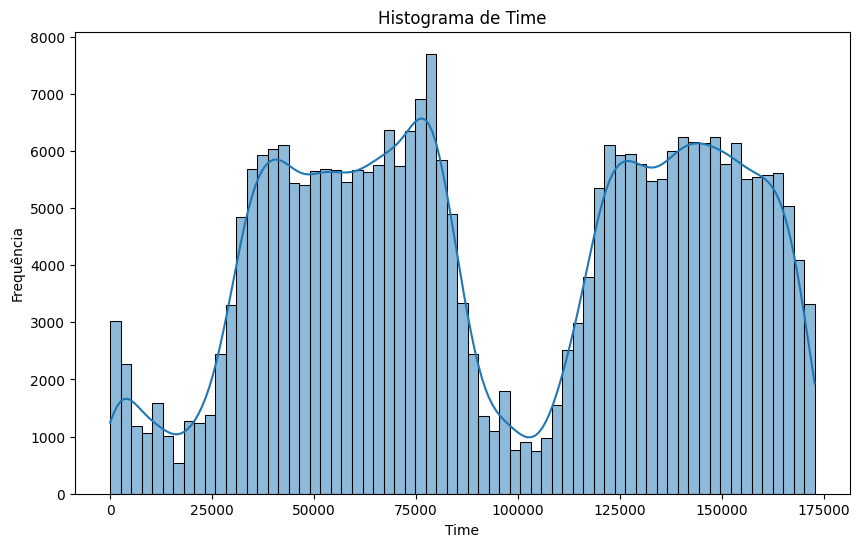

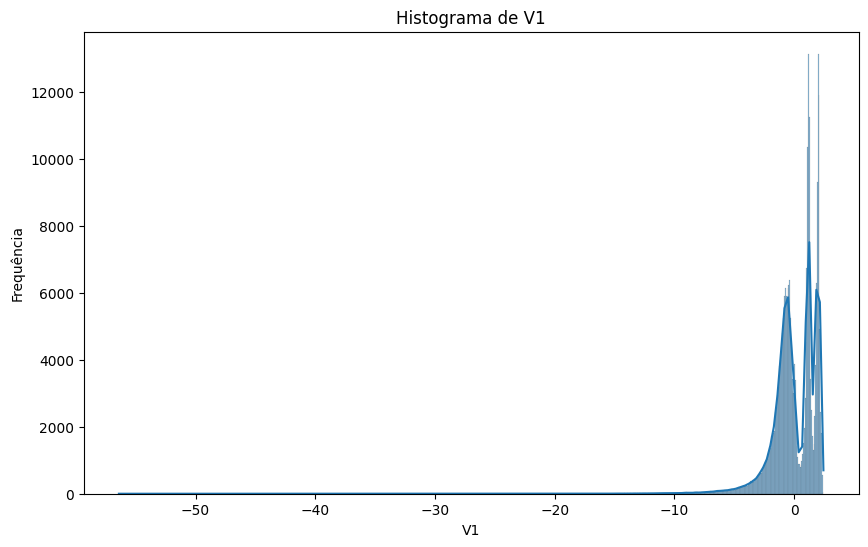

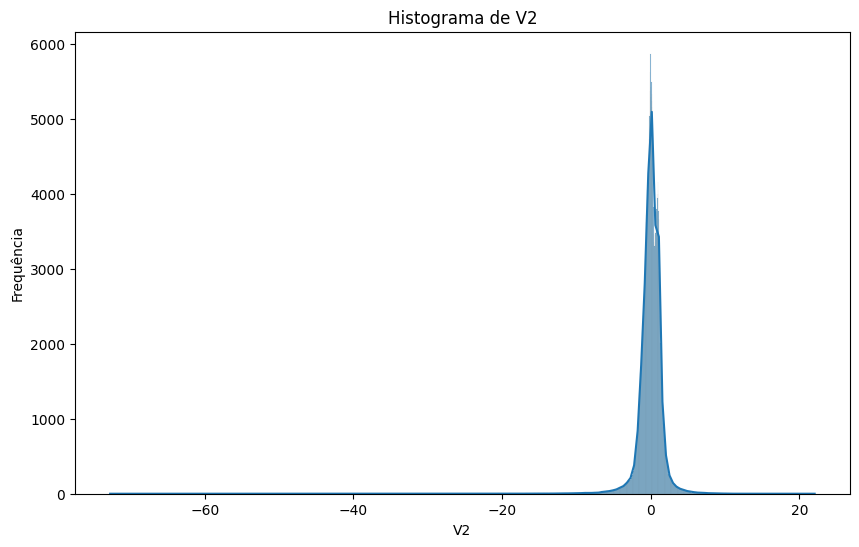

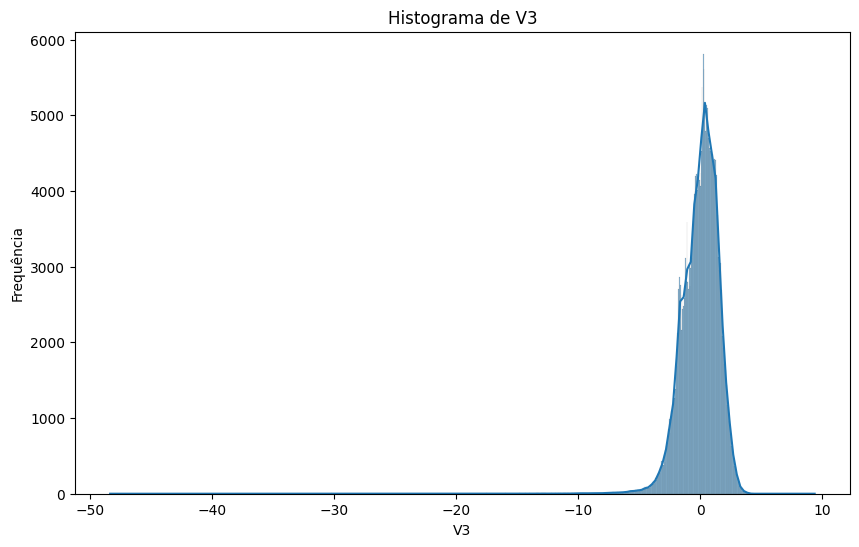

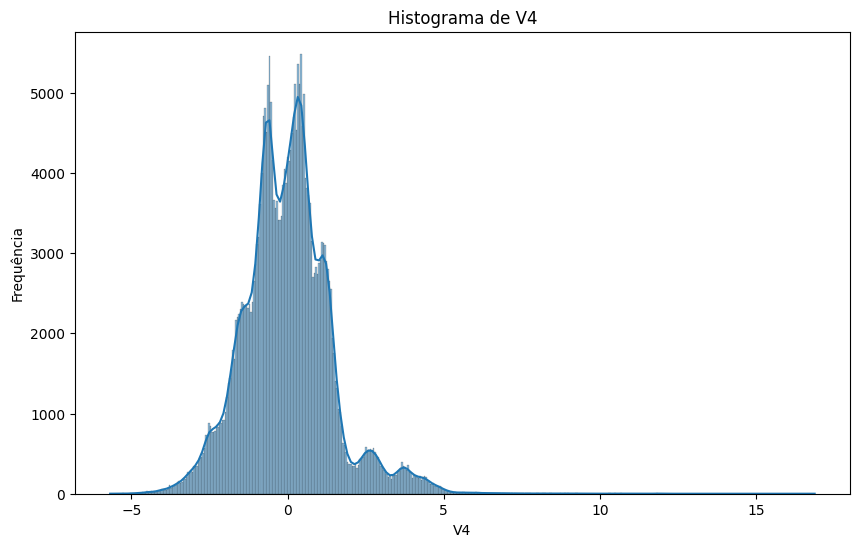

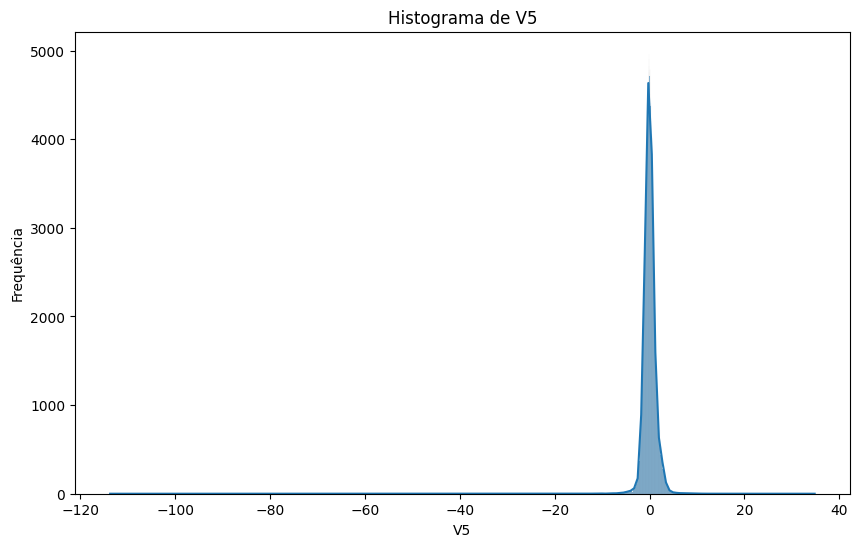

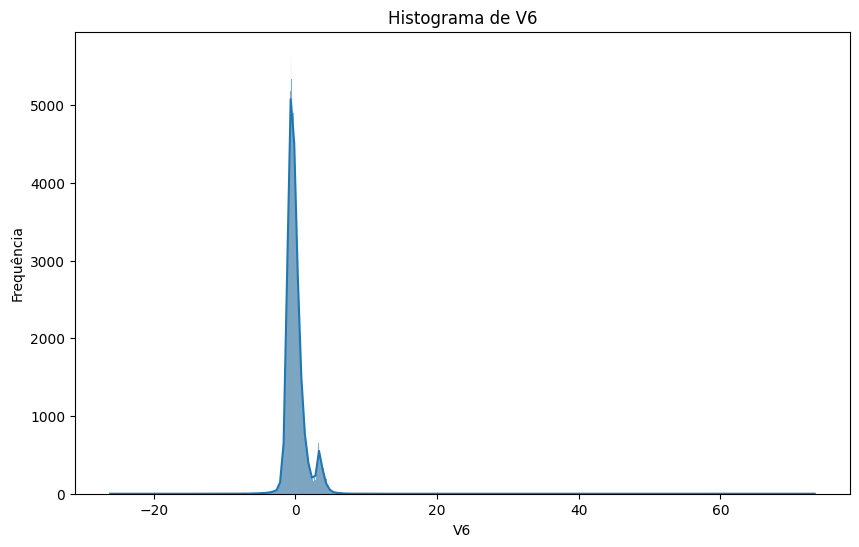

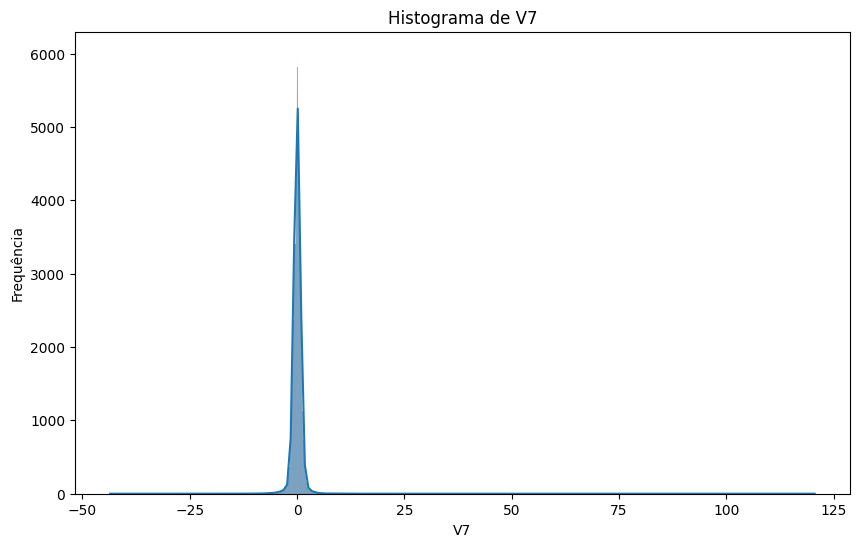

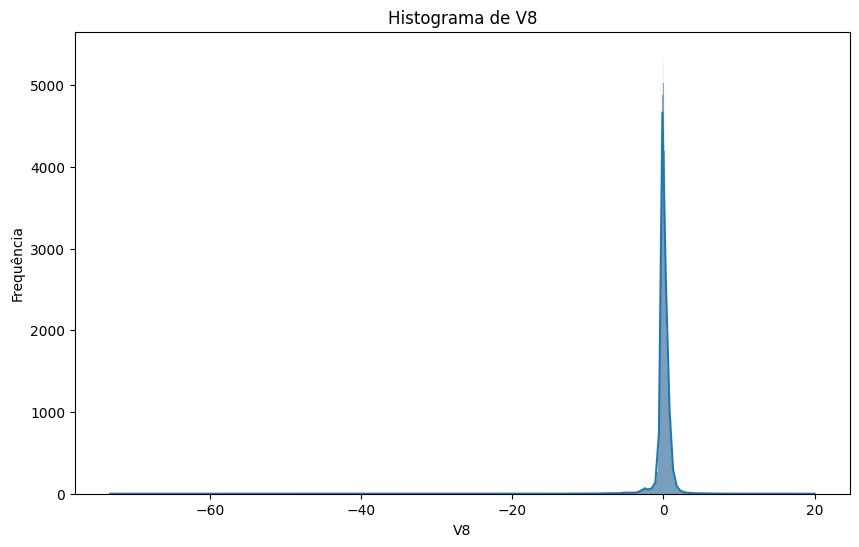

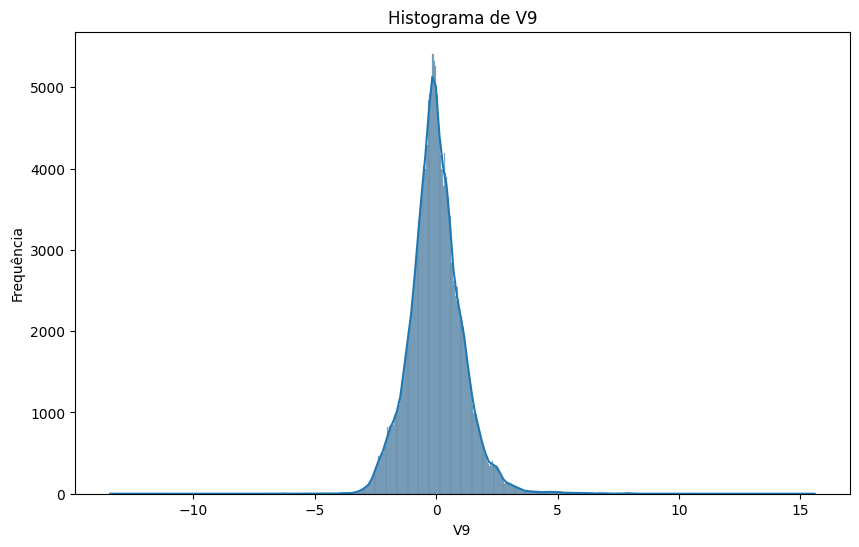

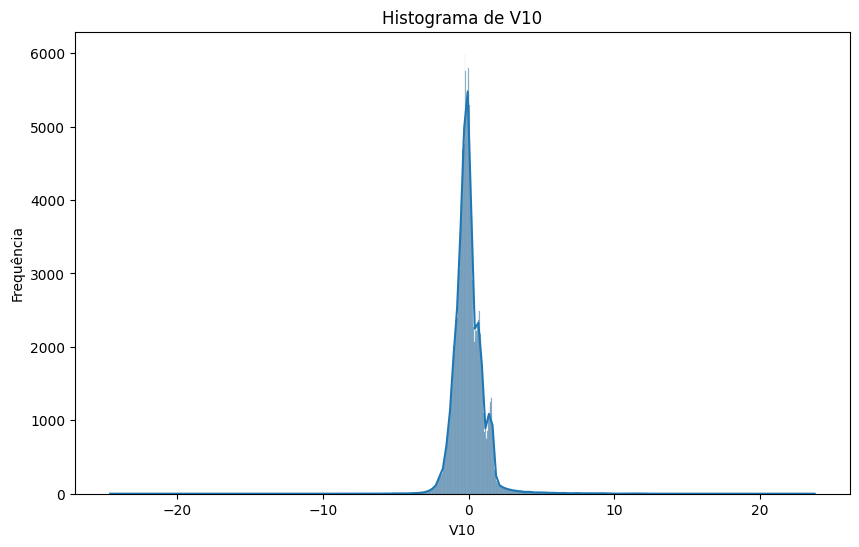

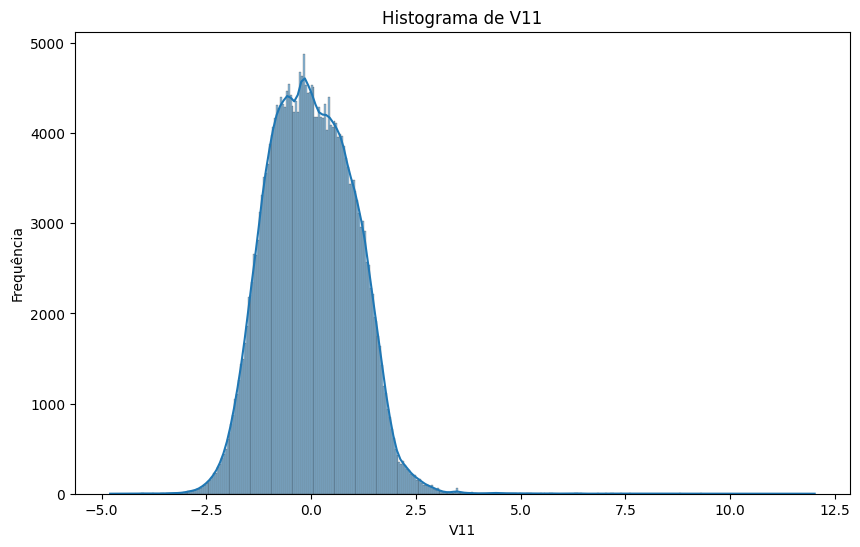

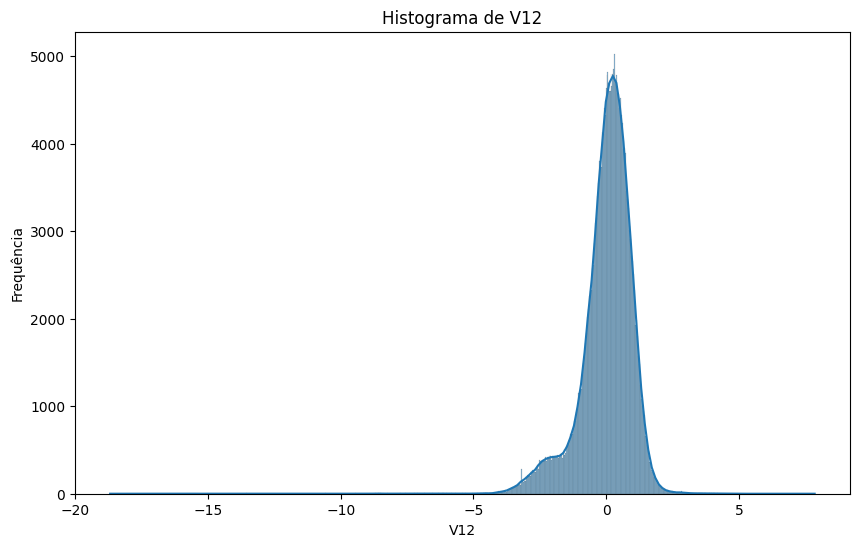

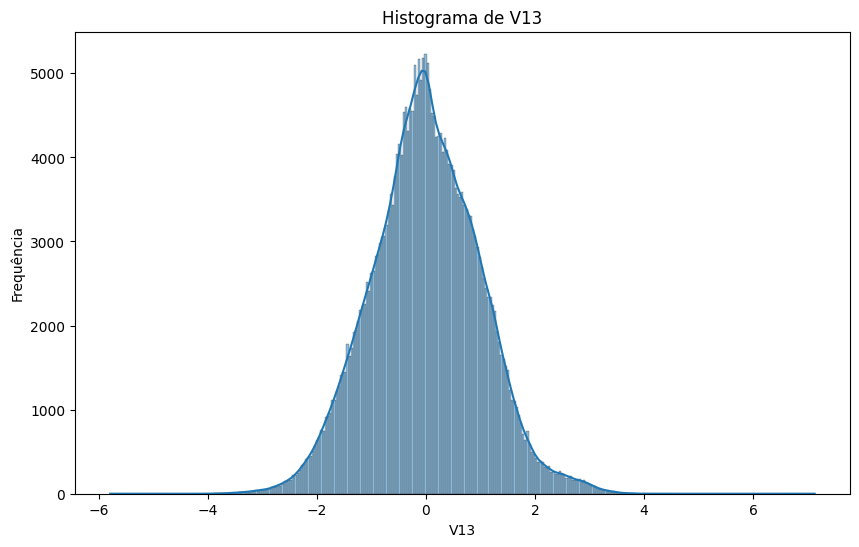

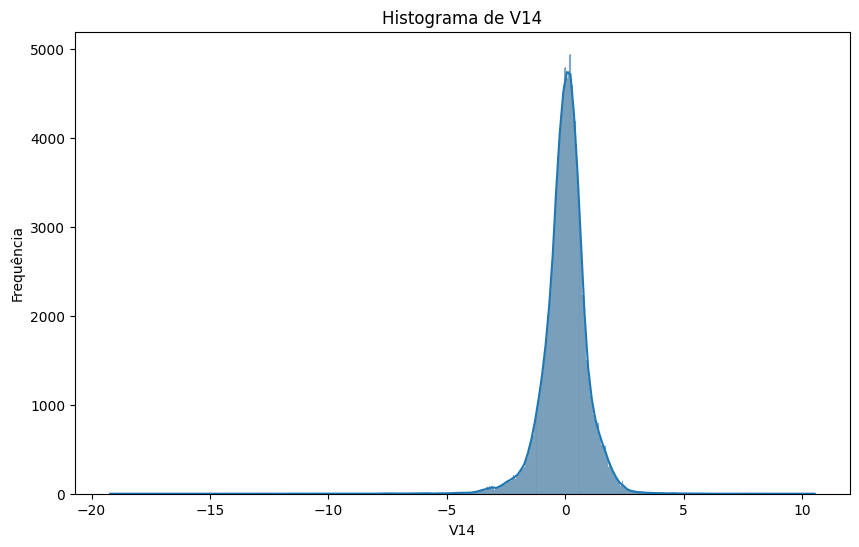

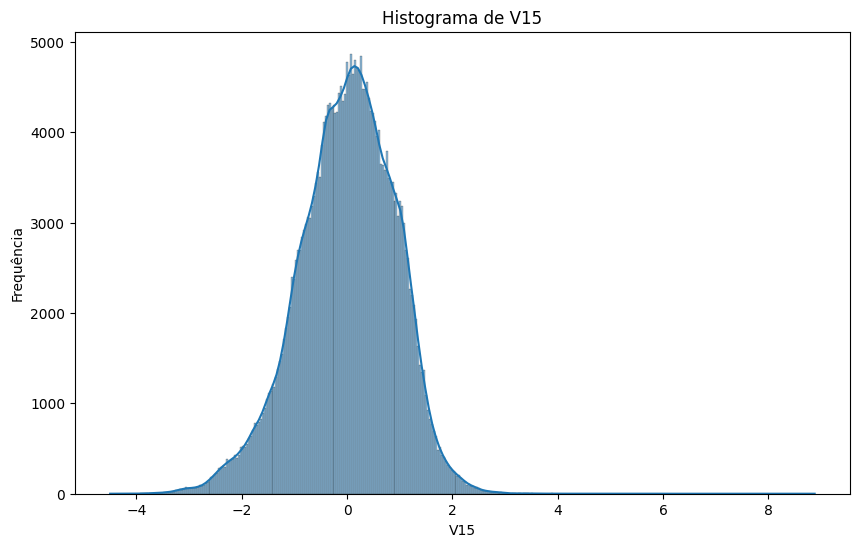

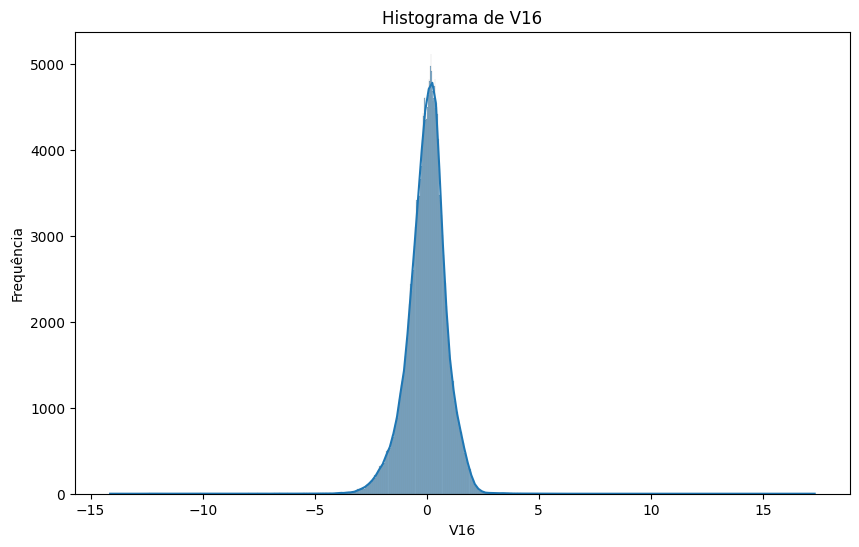

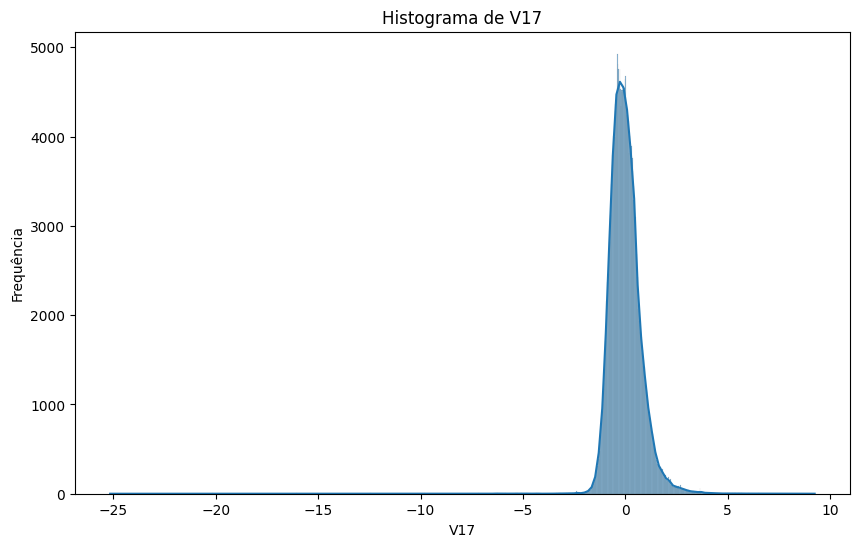

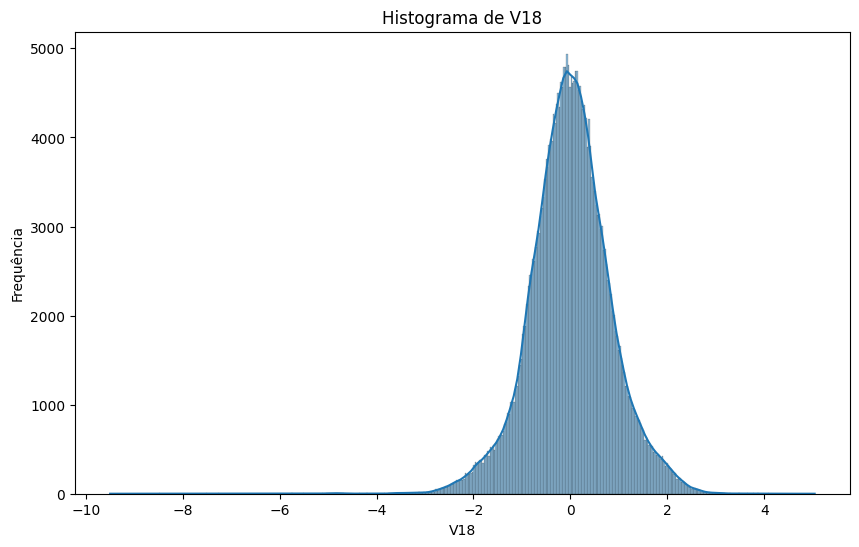

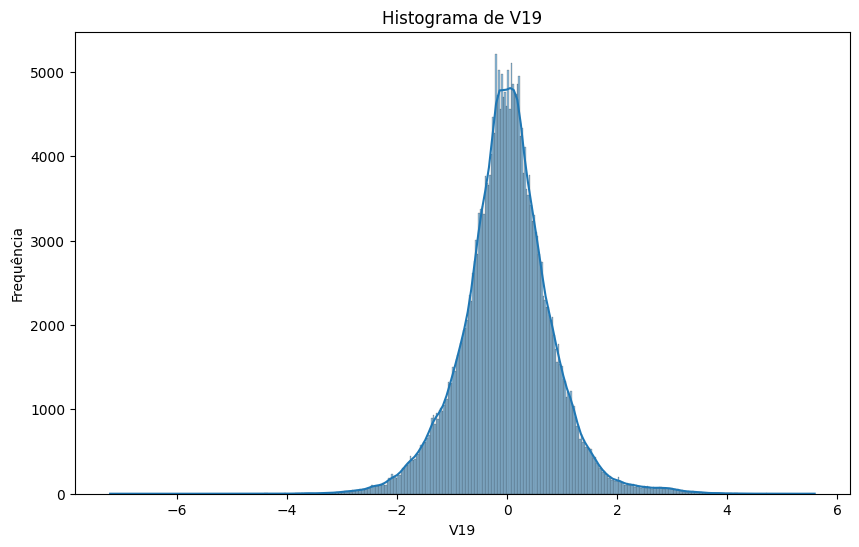

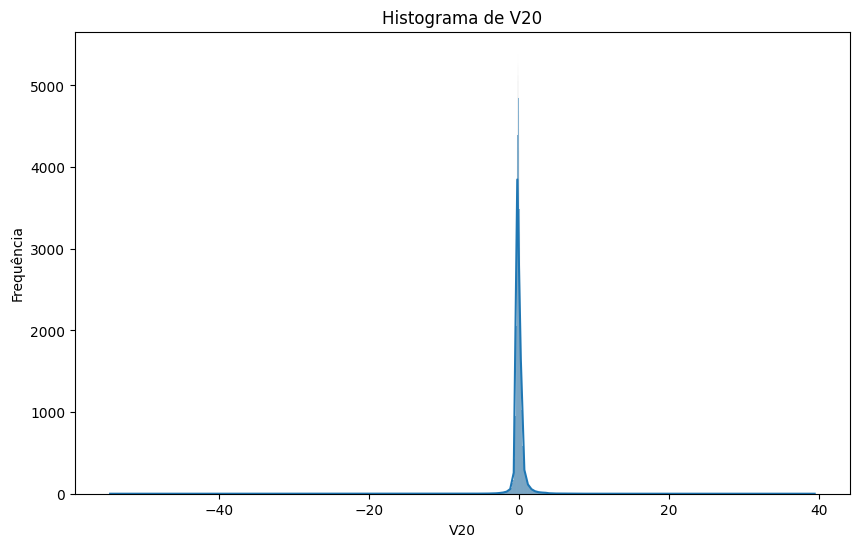

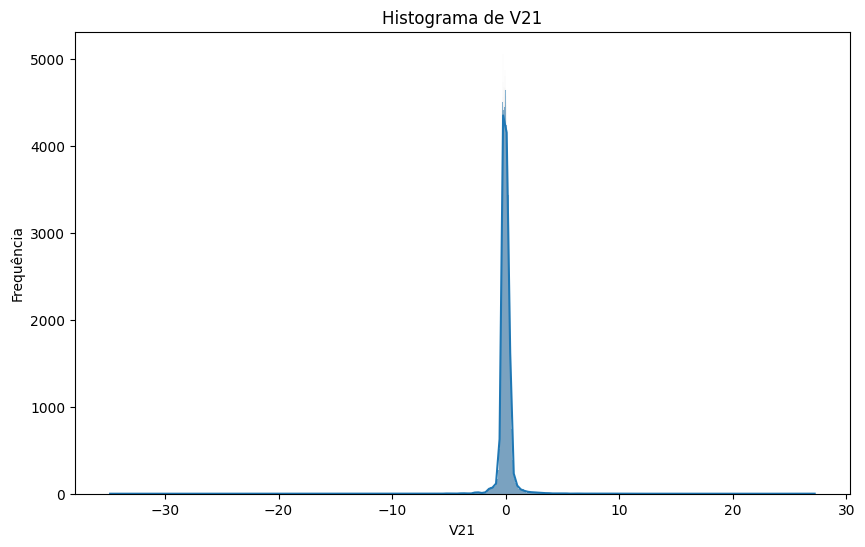

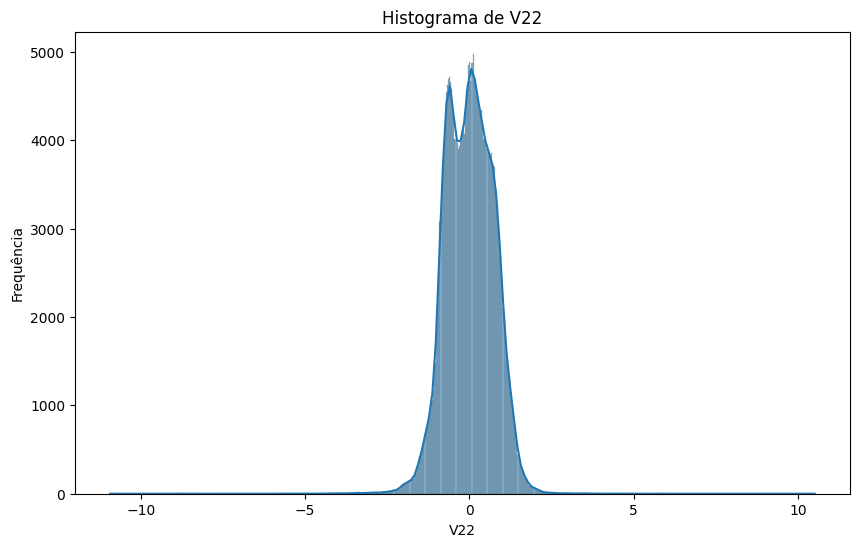

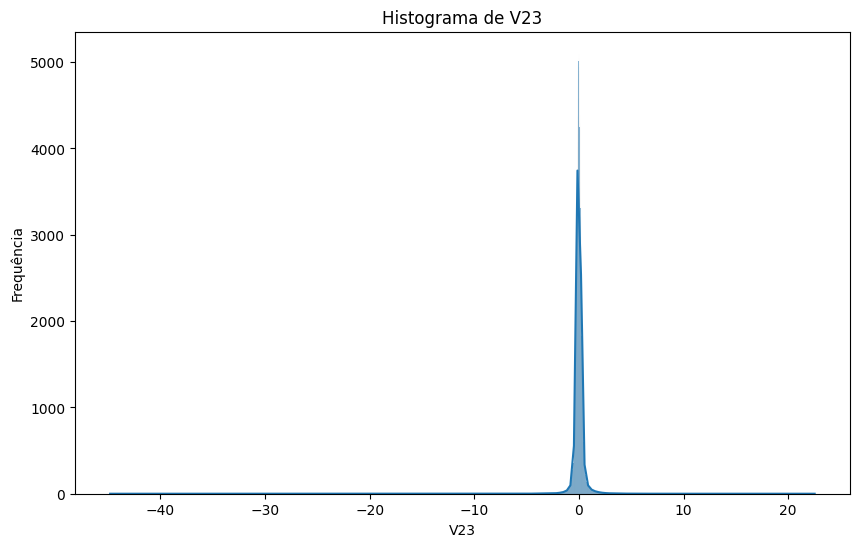

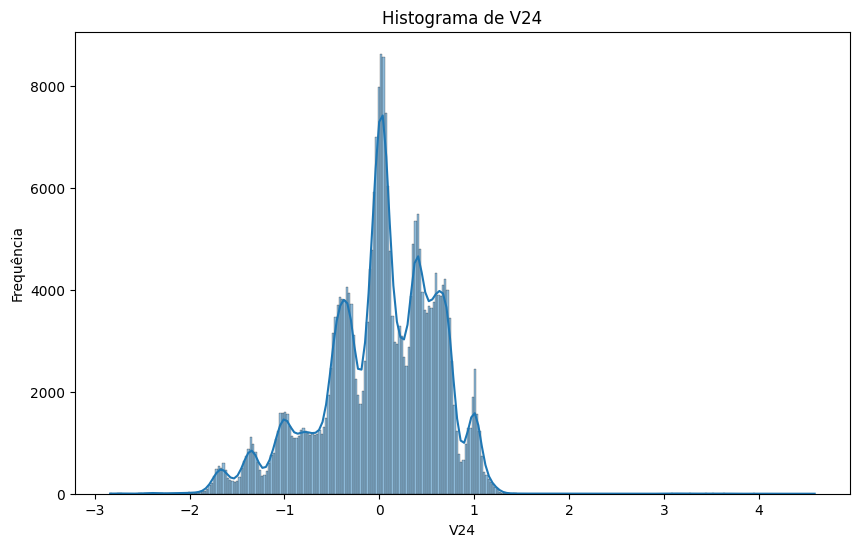

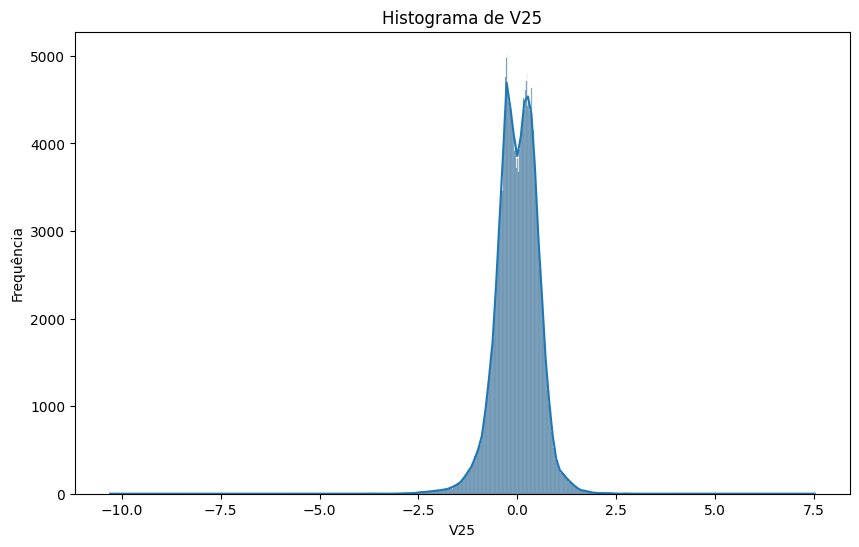

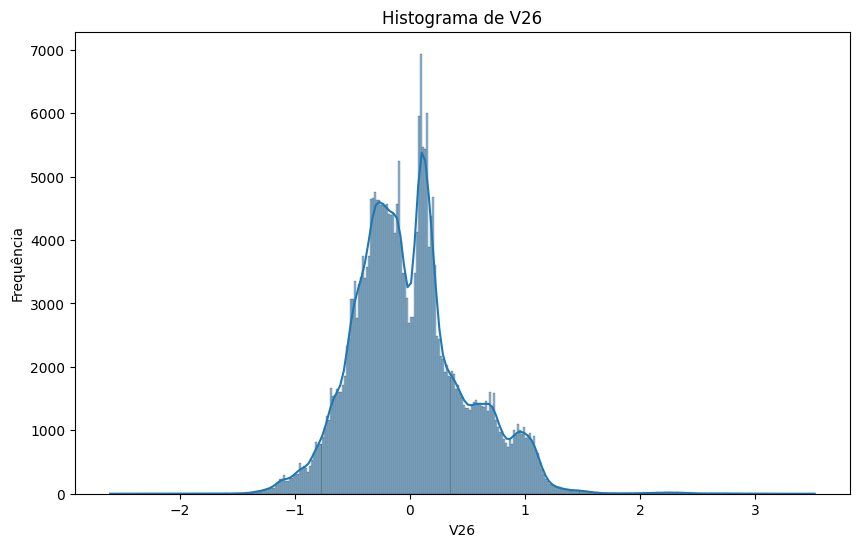

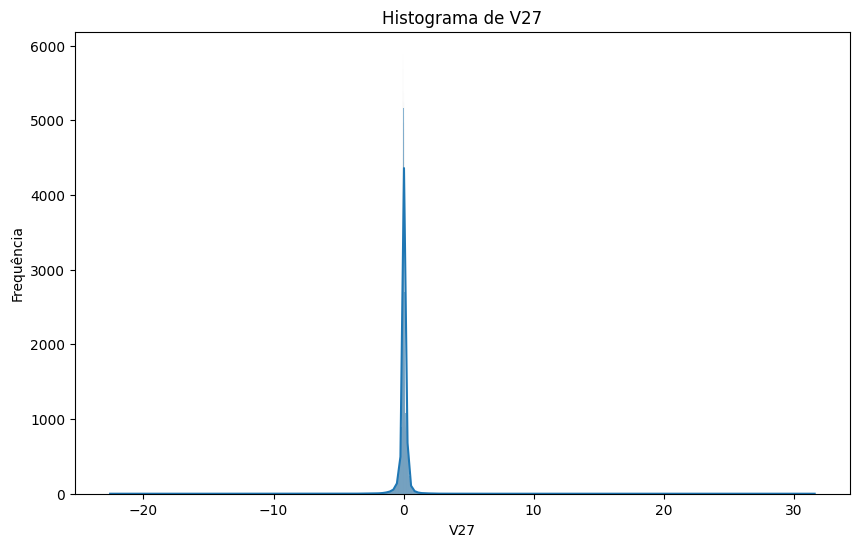

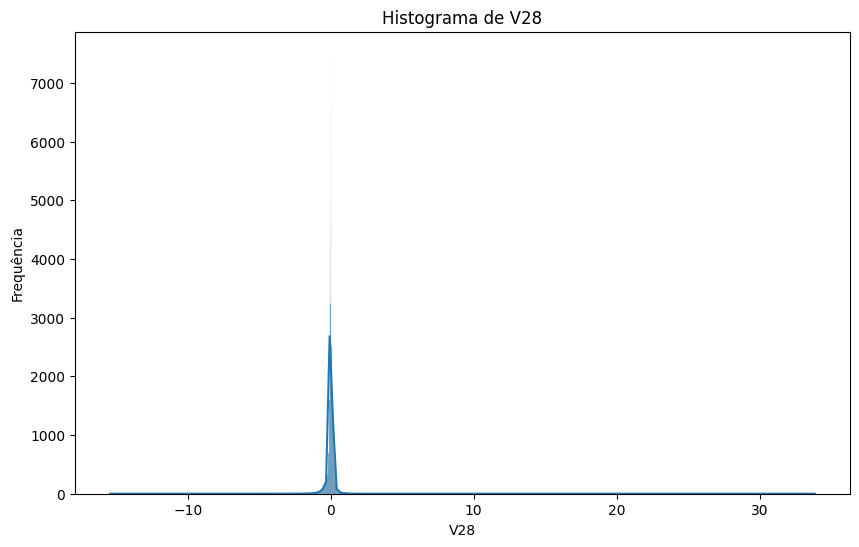

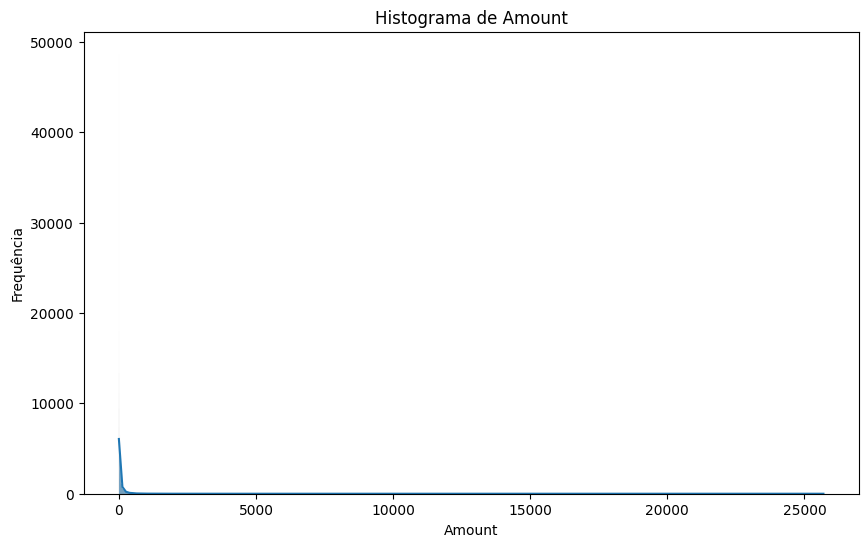

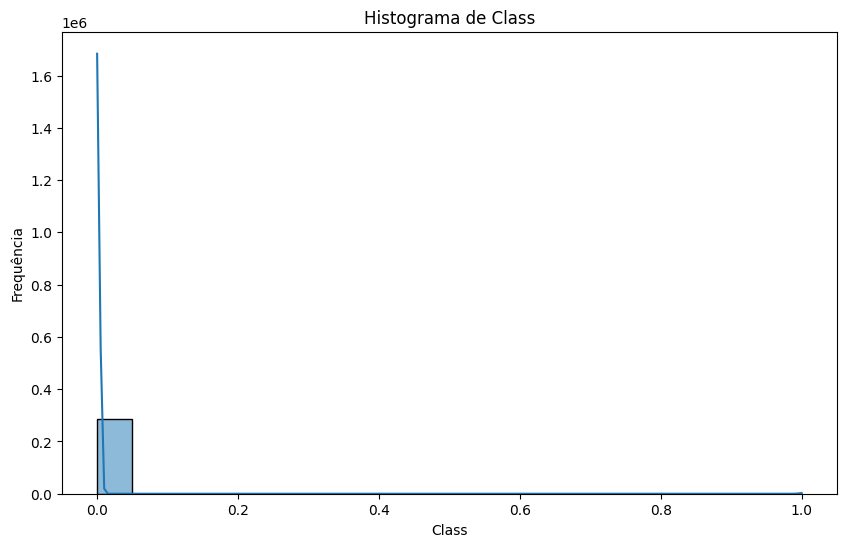

In [99]:
for col in df.columns:
  plot_histogram(df, col)

A partir das distribuições, é visível que as componentes V estão normalizadas. Entretanto, a componente Time e Amount ainda precisam de uma normalização para evitar que ela tenha um maior impacto no modelo pela sua maior grandeza escalar.

Por outro lado, não será preciso codificar nenhum valor textual, devido a inexistência dos mesmos.

Por fim, será necessário olhar com mais detalhes a distribuição da classe Class para compreender melhor o balaceamento das classes.

## Distribuição da classe alvo

In [100]:
class_distribution = df['Class'].value_counts(normalize=True) * 100
print("Distribuição da coluna 'Class' em porcentagem:")
class_distribution

Distribuição da coluna 'Class' em porcentagem:


,proportion
Class,
0,99.827251
1,0.172749


A partir dessa distribuição desigual, será necessário utilizar métricas e uma função de perca que leve o desbalanceamento em consideração.

## Correlação entre as variáveis

Para facilitar a visualização, será apresentado apenas as variáveis que contém uma correlação absoluta maior que 0.03

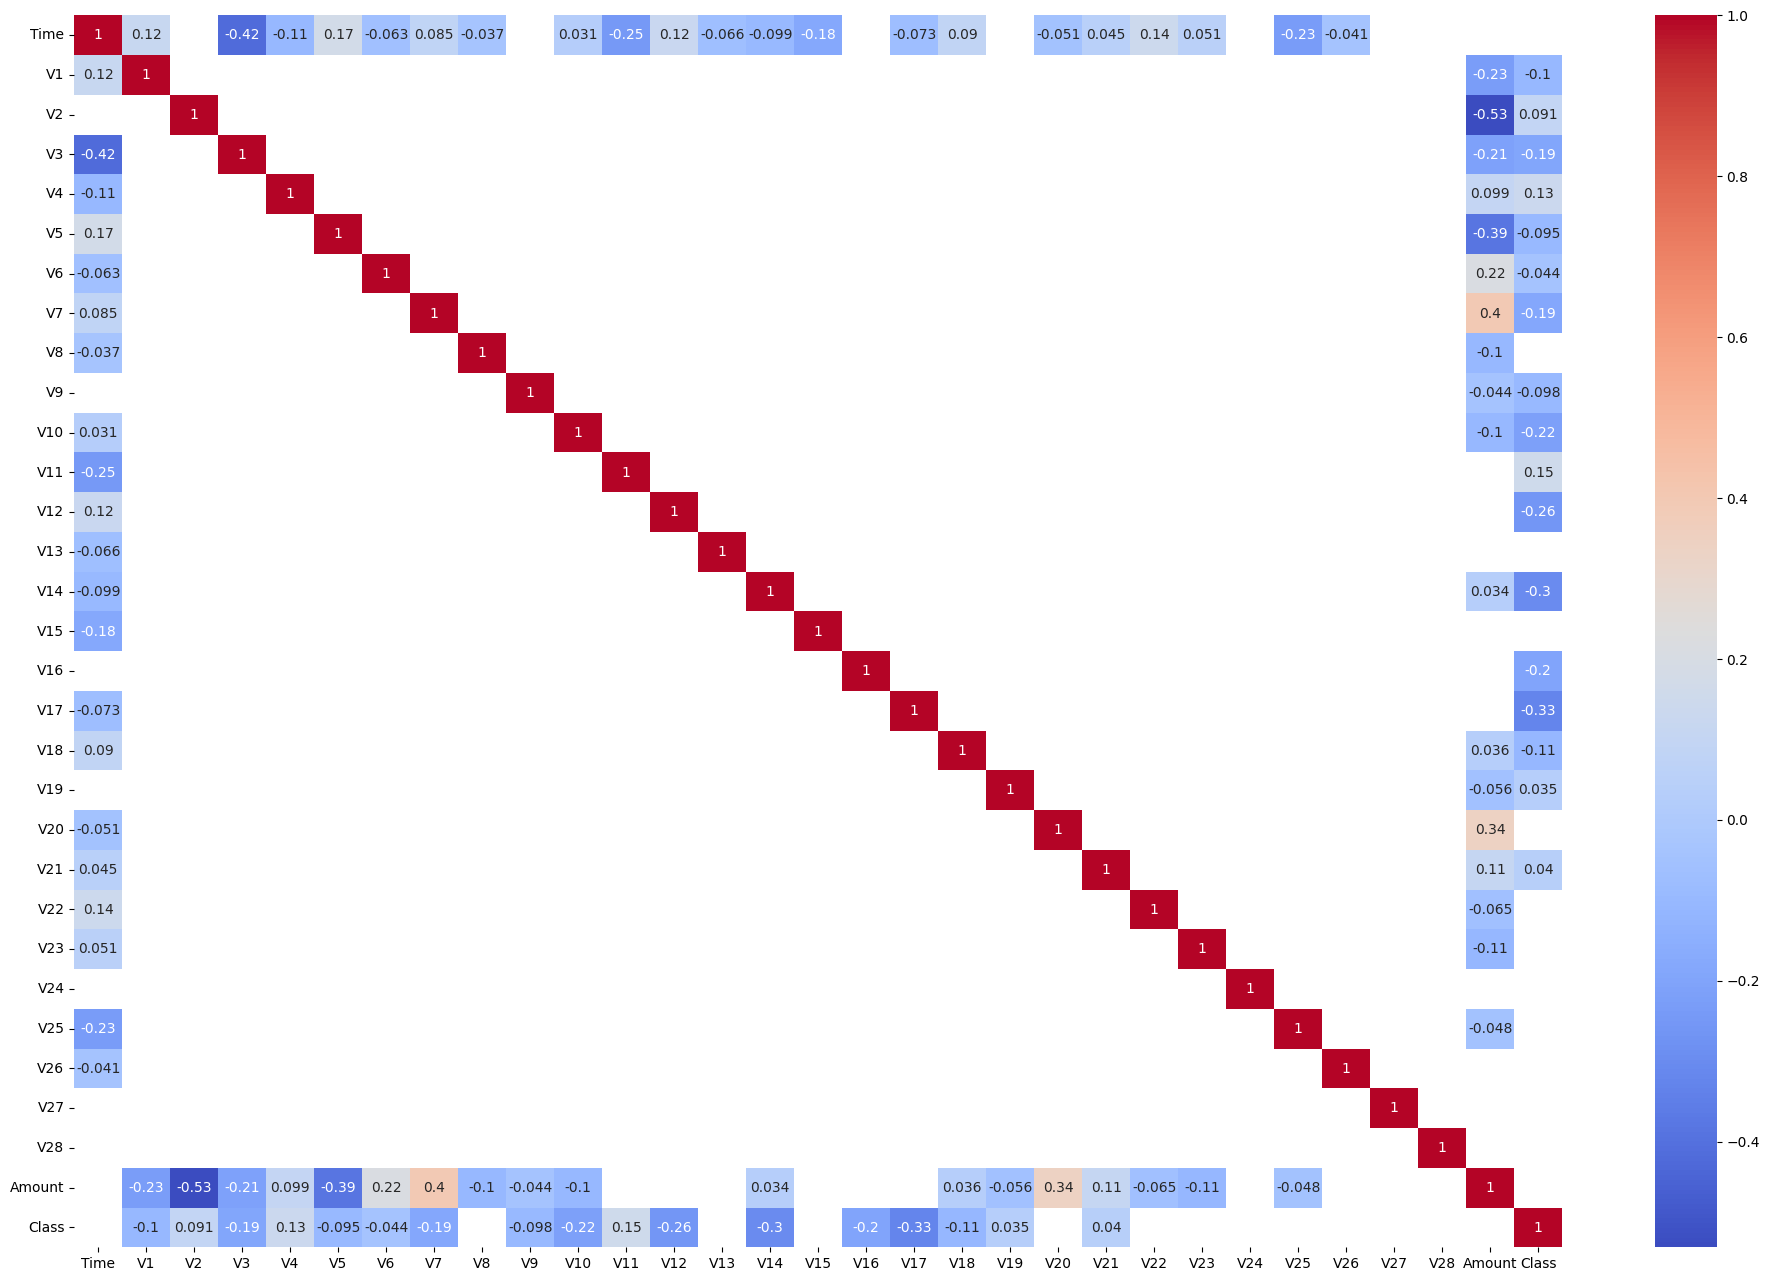

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacao_base = df.corr()
correlacao = correlacao_base.where(correlacao_base.abs() >= 0.03)
plt.figure(figsize=(24, 16))
sns.heatmap(correlacao, annot=True, cmap="coolwarm")
plt.show()

Ao observar esse gráfico, é notável que as variáveis Time, V8, V13, V15, V20, V22, V23, V24, V25, V26, V27, V28 não contém uma forte correlação com a variável dependente (Class)

## Análise da existência dos outliers

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(df, cols=None, figsize=(8, 6)):
    """
    Plots individual boxplots for each numerical variable in the DataFrame.
    Useful for identifying potential outliers.

    Parameters:
        df : pandas DataFrame
            The dataset containing the variables to plot.
        cols : list of str, optional
            List of column names to plot. If None, all numeric columns are used.
        figsize : tuple (width, height), default=(8, 6)
            Size of each individual boxplot figure.
    """
    if cols is None:
        cols = df.select_dtypes(include='number').columns

    for col in cols:
        plt.figure(figsize=figsize)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot - {col}')
        plt.xlabel("Values")  # legenda eixo X
        plt.ylabel(col)       # legenda eixo Y
        plt.tight_layout(pad=2.0)  # aumenta espaço interno da figura
        plt.show()


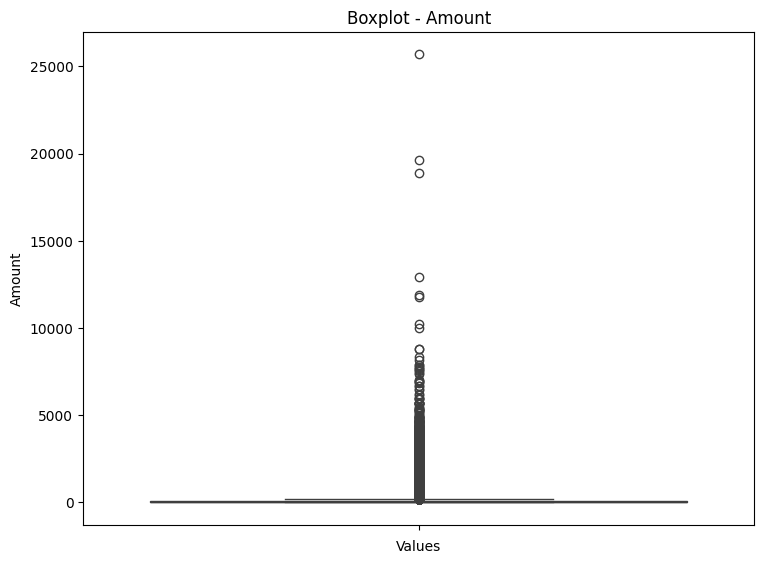

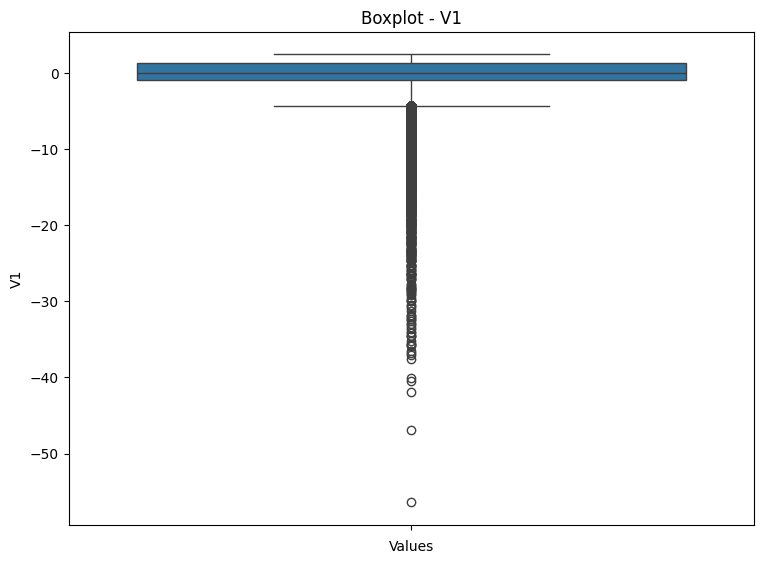

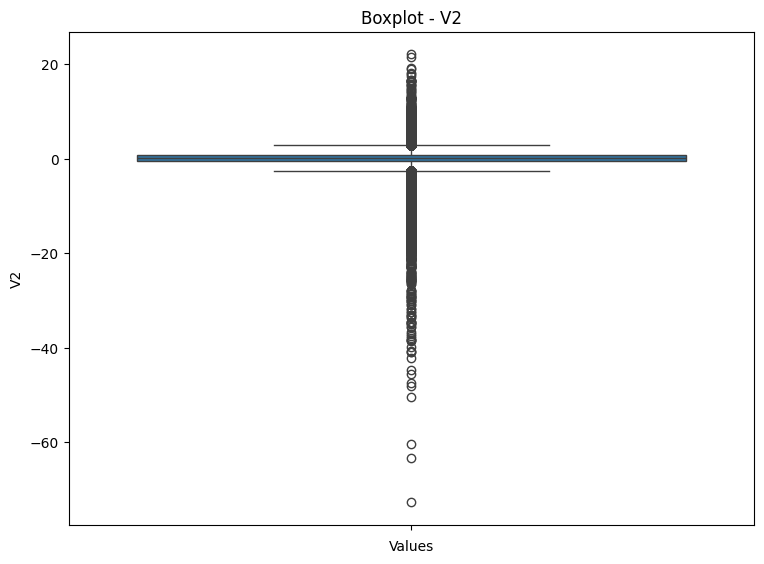

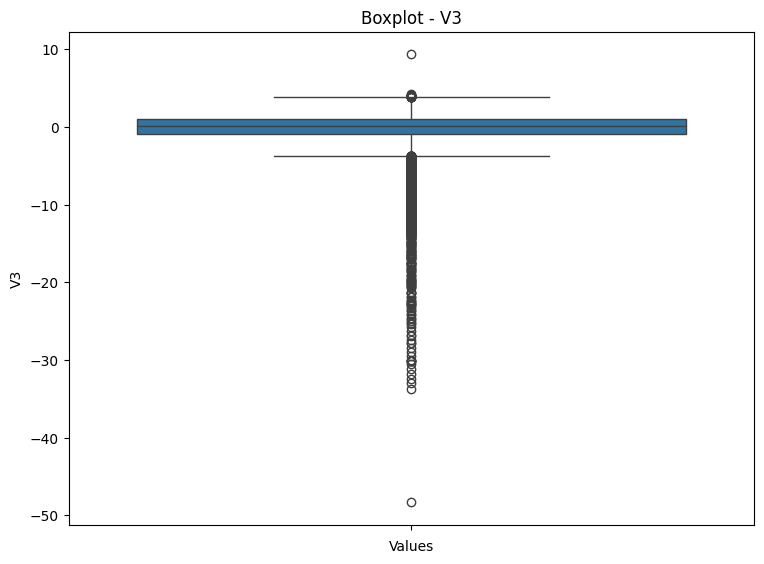

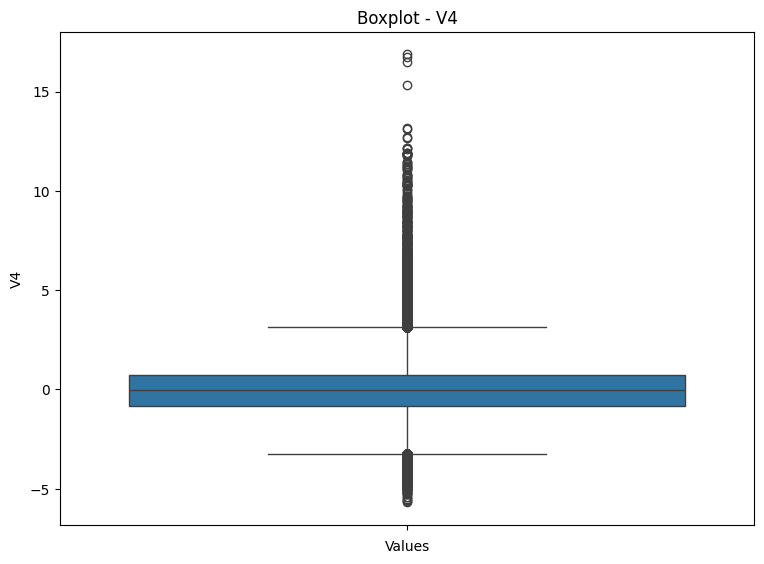

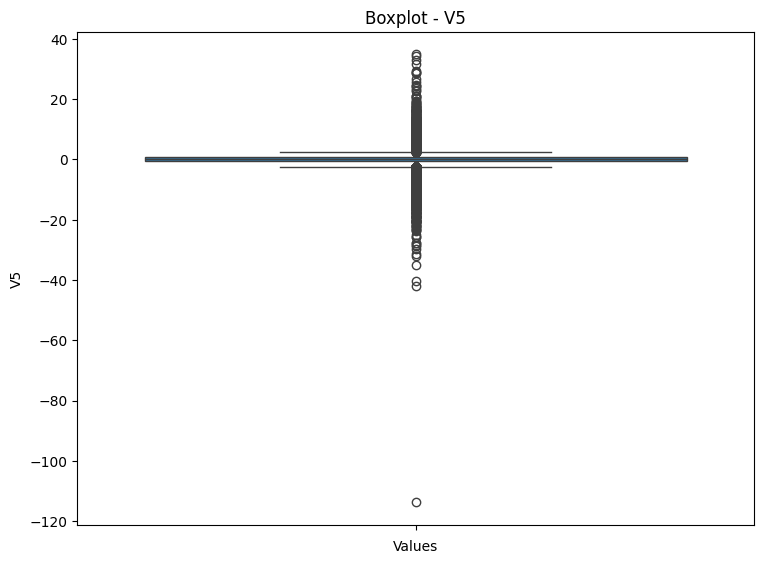

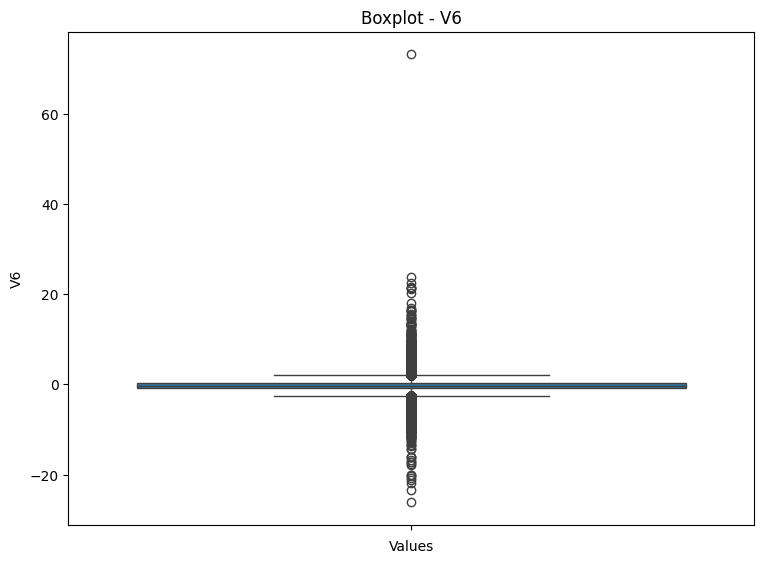

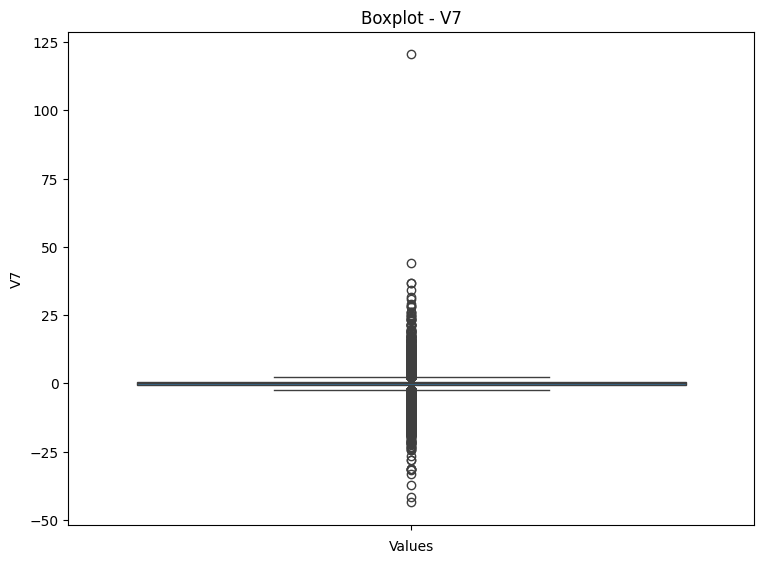

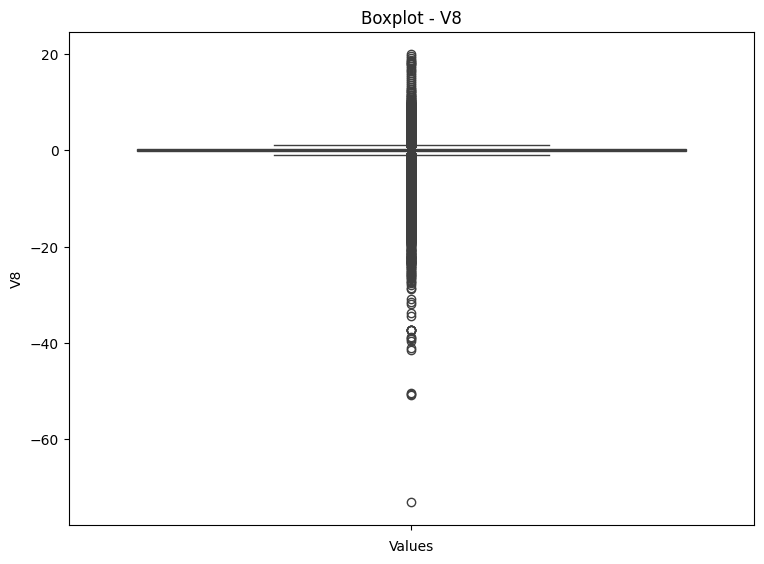

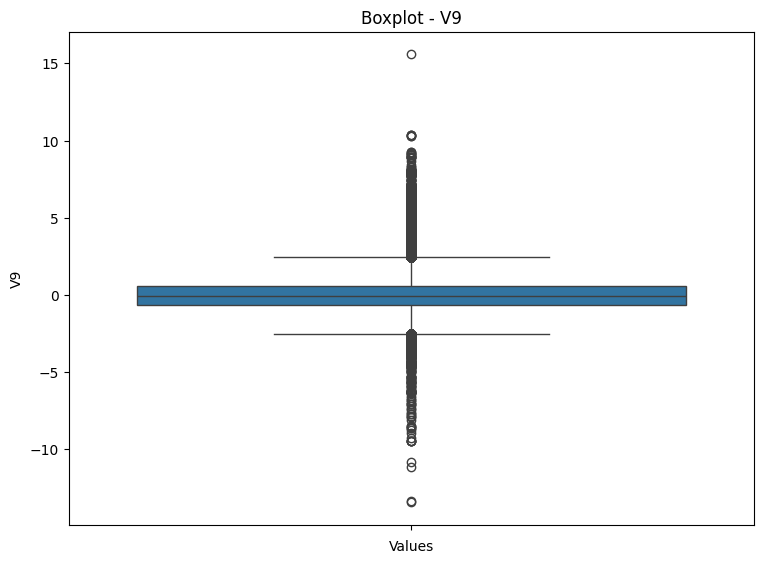

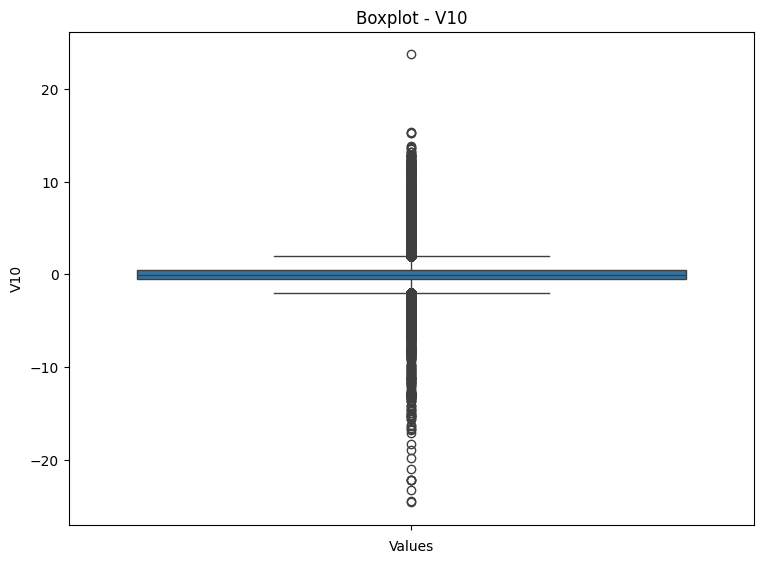

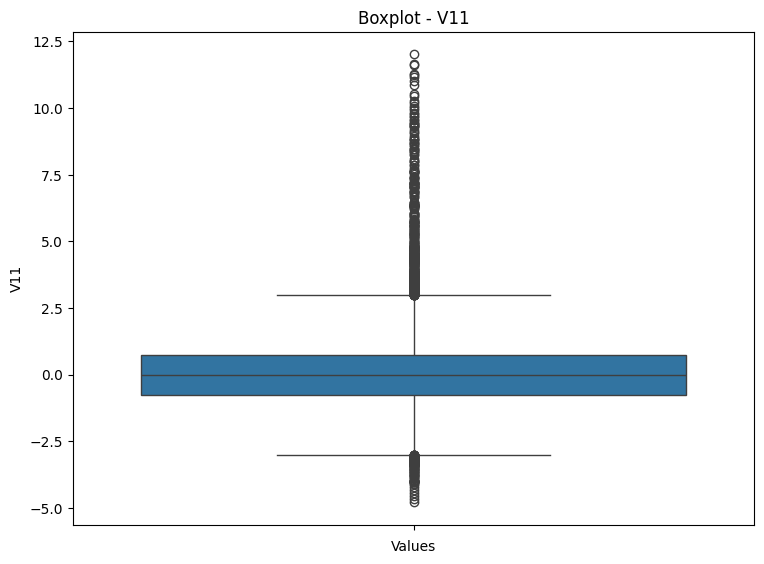

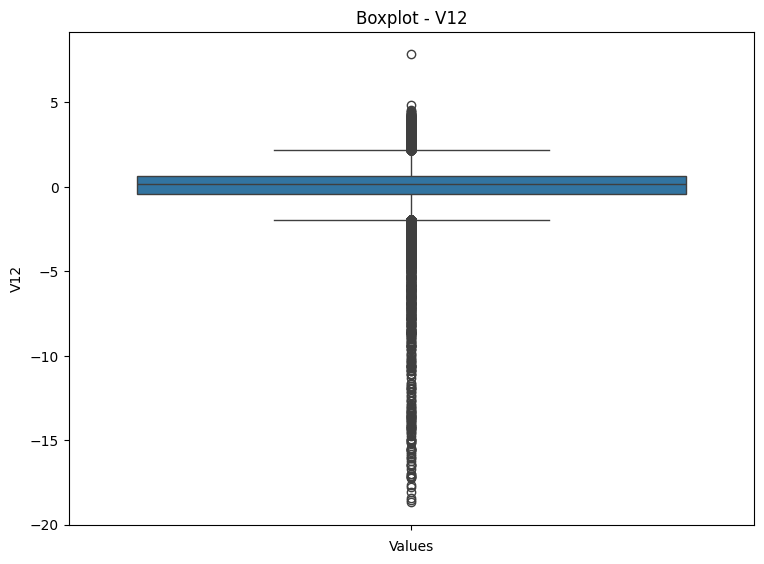

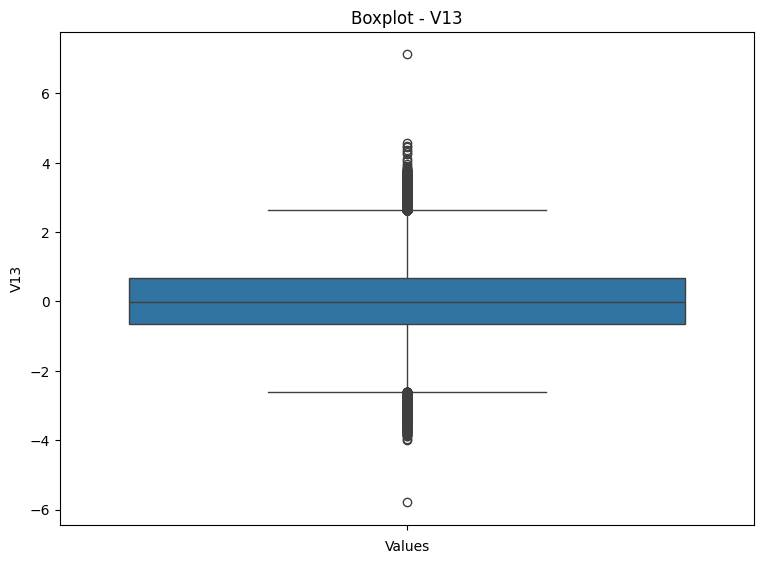

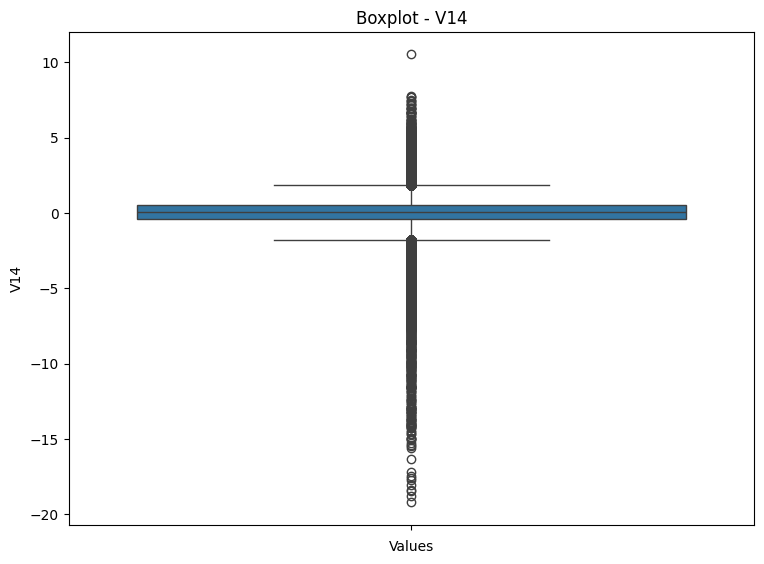

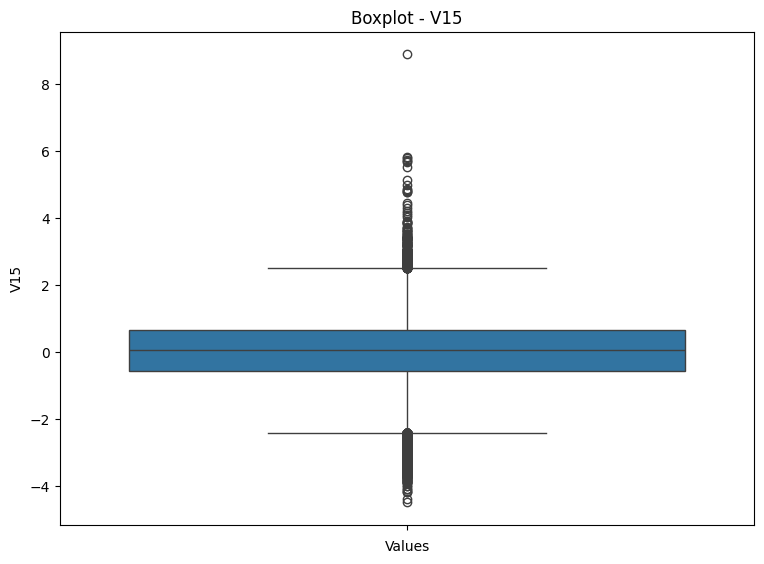

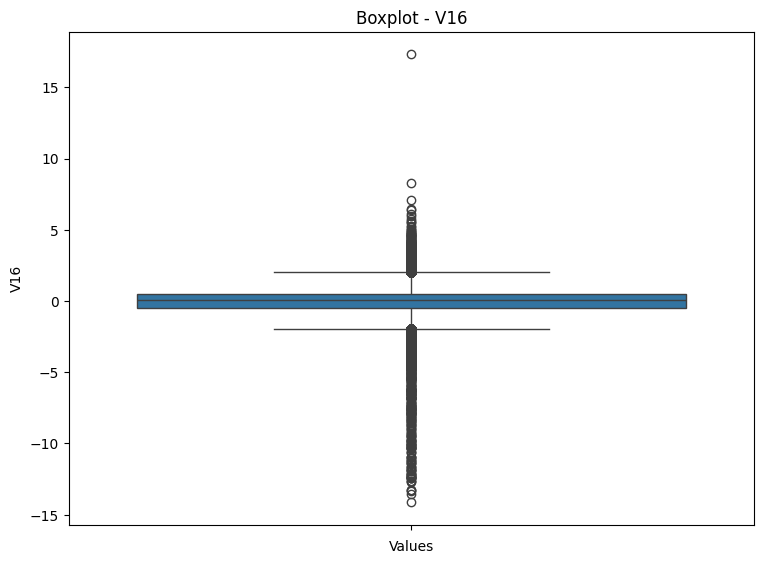

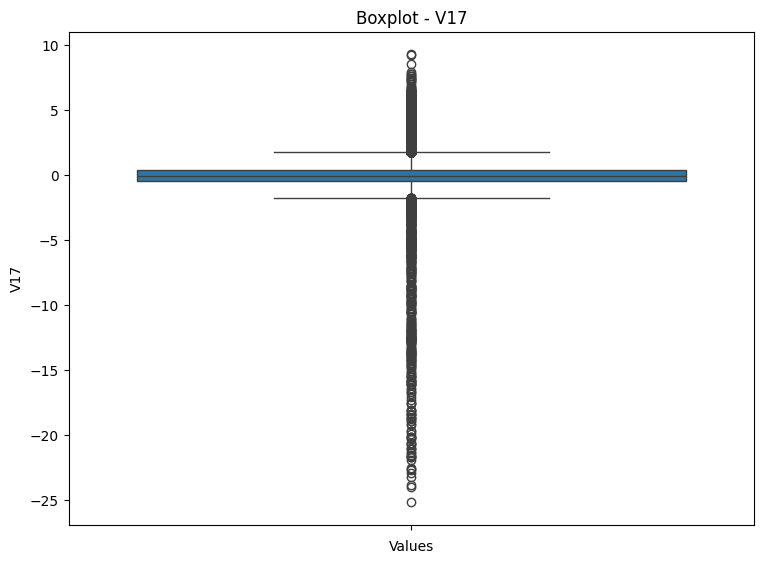

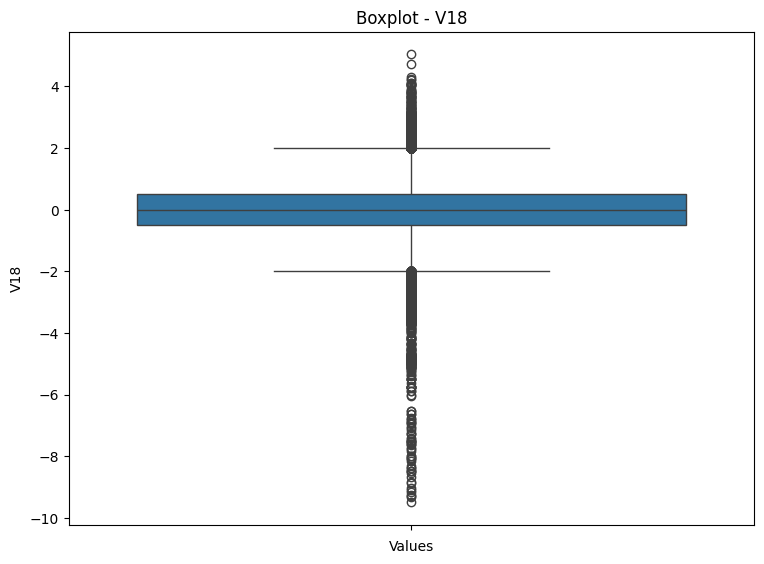

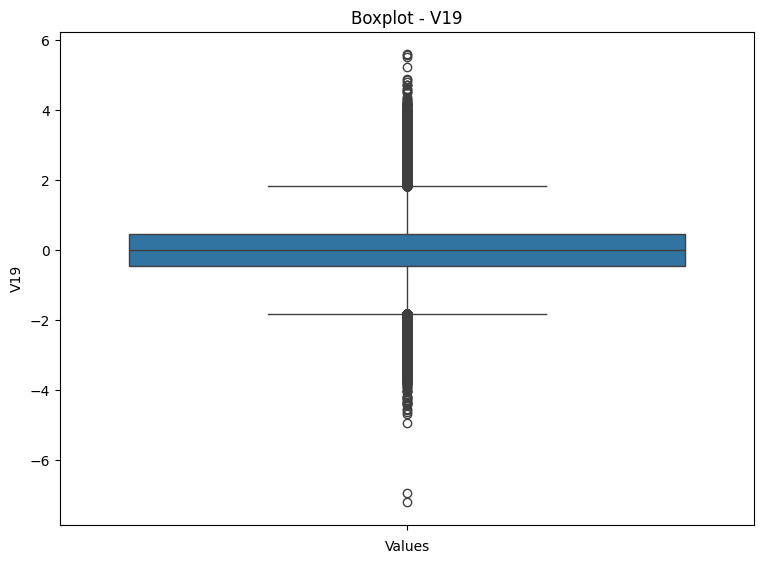

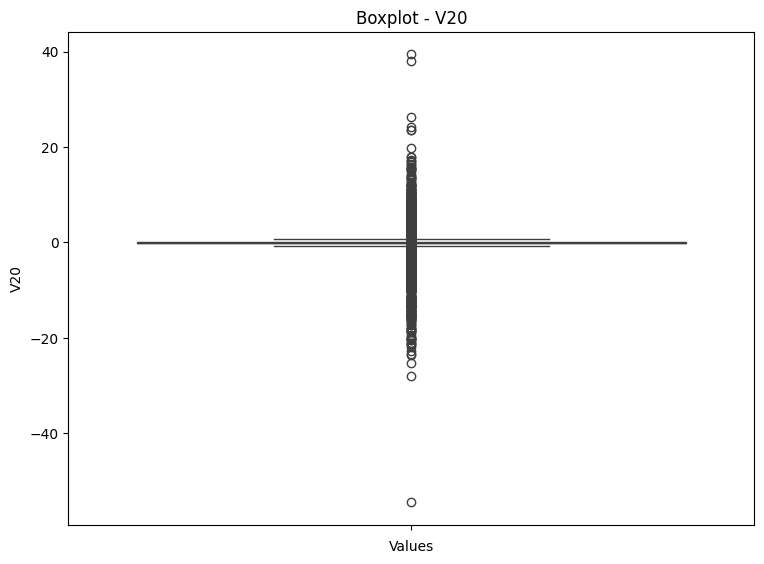

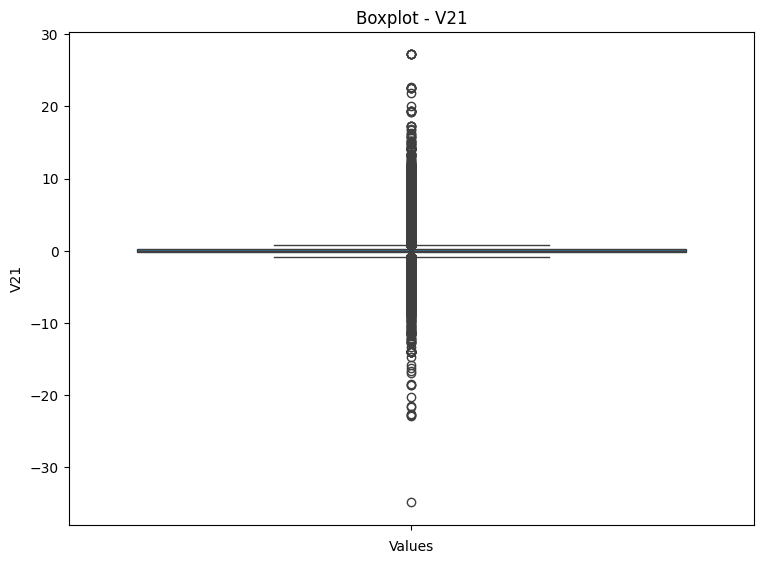

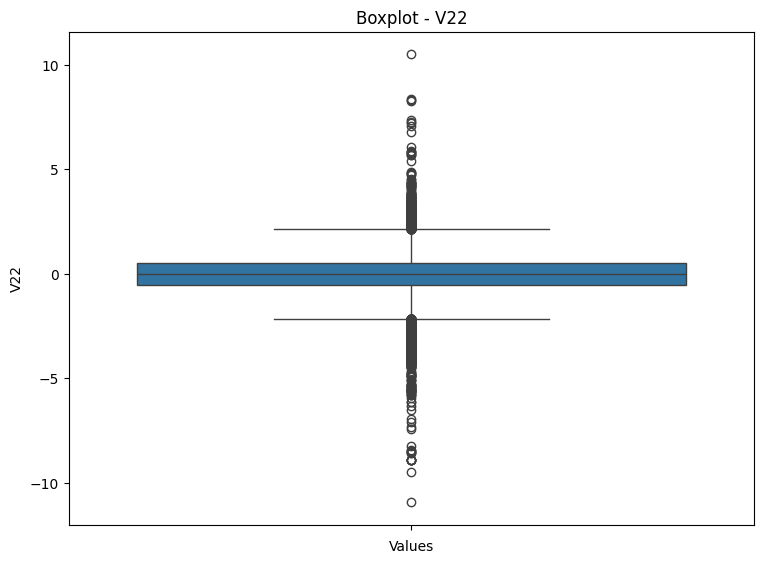

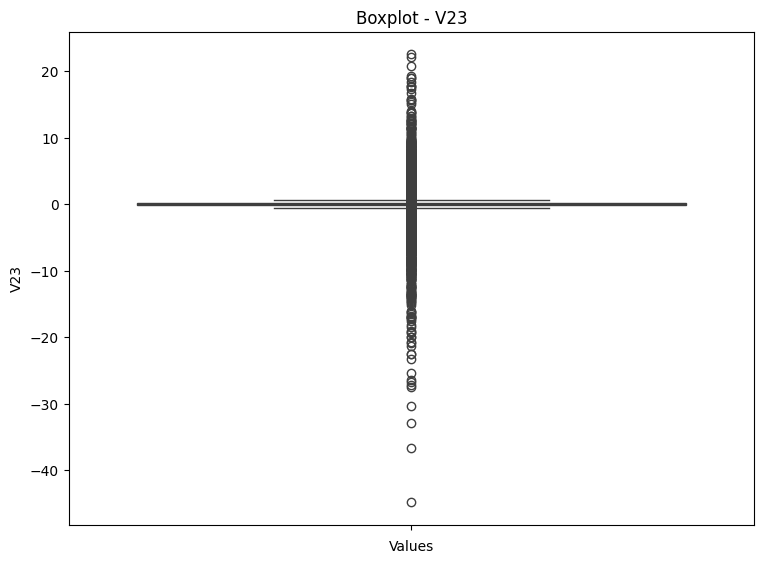

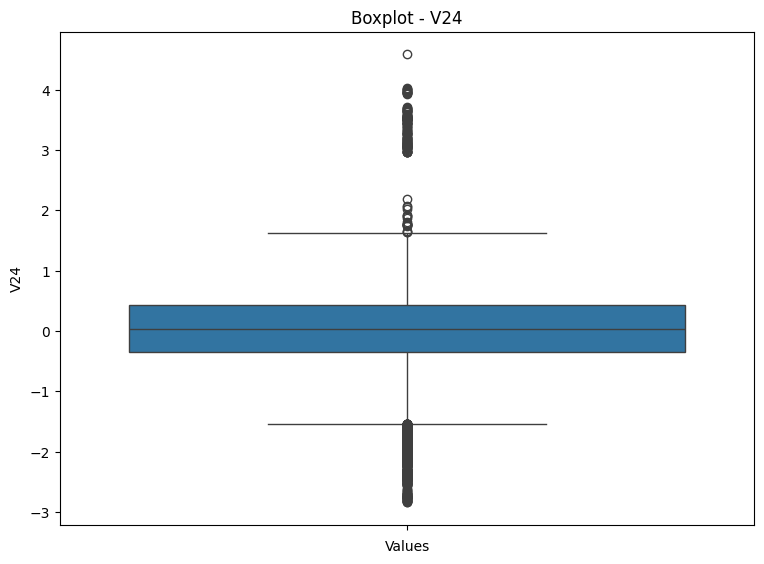

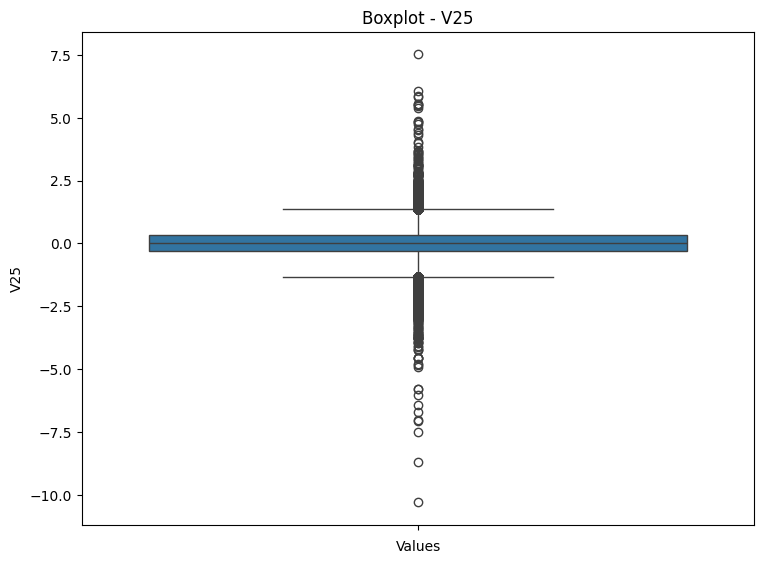

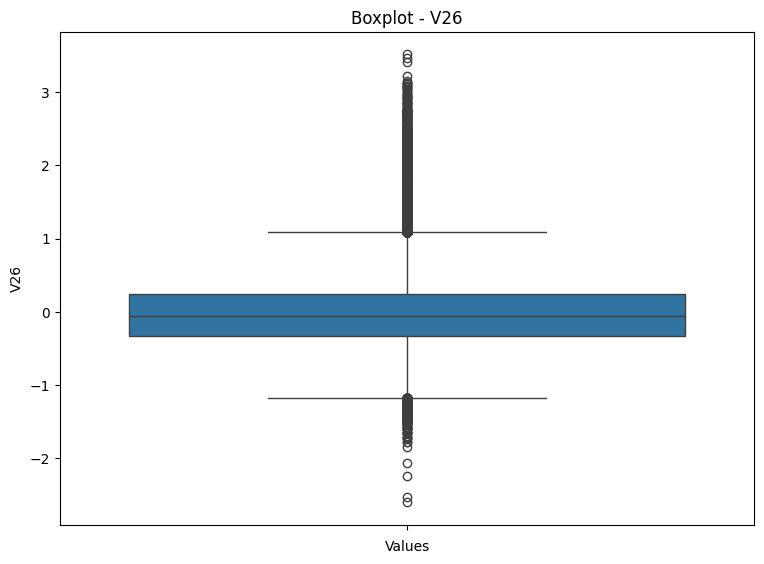

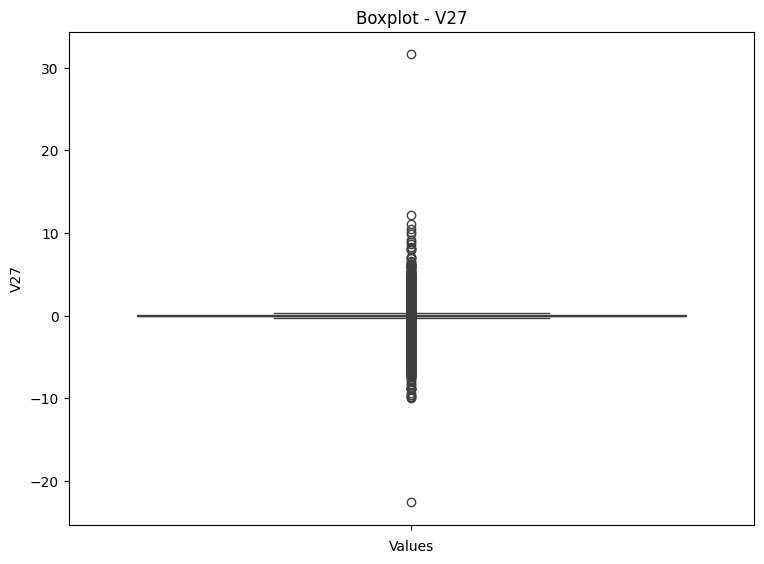

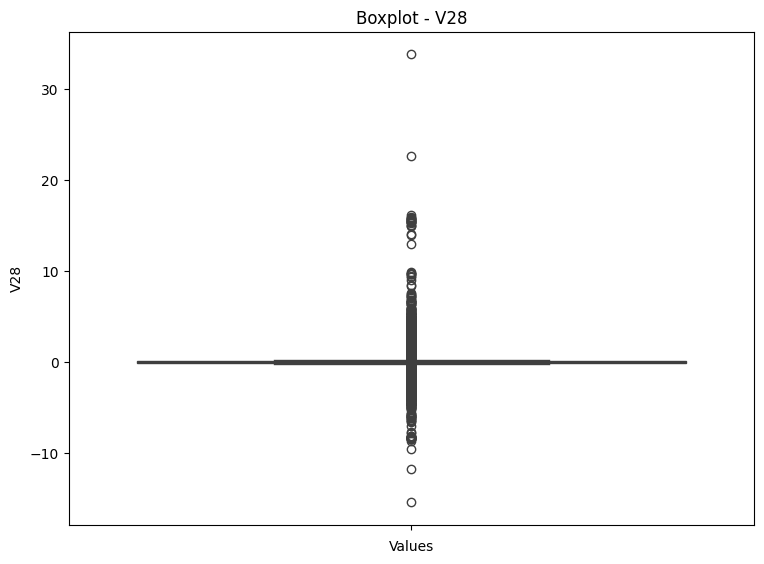

In [103]:
plot_boxplots(df, cols=(['Amount'] + [col for col in df.columns if col.startswith('V')]))

Como é possível observar há muitos outliers em todas as variáveis. Portanto é necessário tratá-los no pré--processamento.

# Pré-processamento

Como será utilizado uma rede neural recorrente, a coluna de tempo (time) não será incluída na maioria das transformações do pré-processamento.

## Separação de treino / validação / teste

Como será utilizado um LSTM, os dados deverão ser ordenados corretamente para que a leitura da série temporal seja corretamente realizada.

- Tamanho das janelas
- Tamanho do set de teste
- Tamanho do set de validação

In [104]:
seq_length = 30
test_size = 0.15
val_size = 0.10

In [105]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

df_sorted = df.sort_values(by="Time").reset_index(drop=True)

X = df_sorted.drop(['Class', 'Time'], axis=1).values
y = df_sorted['Class'].values

n = len(df_sorted)
n_test = int(n * test_size)
n_val = int((n - n_test) * val_size)

X_train = X[:-(n_test + n_val)]
y_train = y[:-(n_test + n_val)]

X_val = X[-(n_test + n_val):-n_test]
y_val = y[-(n_test + n_val):-n_test]

X_test = X[-n_test:]
y_test = y[-n_test:]

print("Shapes após split:")
print(f"Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")


Shapes após split:
Treino: (217878, 29), Validação: (24208, 29), Teste: (42721, 29)


## Remoção dos outliers

In [107]:
def remove_outliers(df, factor=1.5):
    df_clean = df.copy()
    for col in df_clean.select_dtypes(include=np.number).columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

train_df = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='Class')], axis=1)
train_df_clean = remove_outliers(train_df)

X_train = train_df_clean.drop('Class', axis=1).to_numpy()
y_train = train_df_clean['Class'].to_numpy()

## Normalização dos dados

Criação da função de normalização

In [108]:
import json
from sklearn.preprocessing import StandardScaler

def normalize_and_save_params(df, columns_to_normalize, output_json_path='normalization_params.json'):
    """
    Normaliza colunas de um DataFrame usando StandardScaler e salva os parâmetros (média e desvio padrão).

    Args:
        df: DataFrame do pandas.
        columns_to_normalize: Lista de nomes das colunas a serem normalizadas.
        output_json_path: Caminho para o arquivo JSON onde os parâmetros serão salvos.

    Returns:
        DataFrame com as colunas normalizadas.
    """
    scaler = StandardScaler()
    df_normalized = df.copy()
    df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

    normalization_params = {}
    for i, col in enumerate(columns_to_normalize):
        normalization_params[col] = {
            'mean': scaler.mean_[i],
            'std': scaler.scale_[i]
        }

    with open(output_json_path, 'w') as f:
        json.dump(normalization_params, f, indent=4)

    print(f"Parâmetros de normalização salvos em '{output_json_path}'")
    return df_normalized

def apply_normalization(df, json_params_path='normalization_params.json'):
    """
    Aplica normalização a colunas de um DataFrame usando parâmetros de um arquivo JSON.

    Args:
        df: DataFrame do pandas a ser normalizado.
        json_params_path: Caminho para o arquivo JSON contendo os parâmetros de normalização.

    Returns:
        DataFrame com as colunas normalizadas.
    """
    with open(json_params_path, 'r') as f:
        normalization_params = json.load(f)

    df_normalized = df.copy()
    for col, params in normalization_params.items():
        mean = params['mean']
        std = params['std']
        # Apply normalization: (x - mean) / std
        df_normalized[col] = (df_normalized[col] - mean) / std

    print(f"Normalização aplicada usando parâmetros de '{json_params_path}'")
    return df_normalized

Aplicação da função de normalização: gera a média e o desvio-padrão pelo treino e normaliza o treino, validação e teste com os dados do treino

Dado que Time será a variável utilizada para gerar as sequências, ela não será normalizada.

In [109]:
df_cols = df_sorted.drop(['Class', 'Time'], axis=1).columns
X_train_df = pd.DataFrame(X_train, columns=df_cols)
X_val_df = pd.DataFrame(X_val, columns=df_cols)
X_test_df = pd.DataFrame(X_test, columns=df_cols)

columns_to_normalize = ['Amount']

X_train_norm = normalize_and_save_params(X_train_df, columns_to_normalize, output_json_path='normalization_params.json')
X_val_norm = apply_normalization(X_val_df, 'normalization_params.json')
X_test_norm = apply_normalization(X_test_df, 'normalization_params.json')

Parâmetros de normalização salvos em 'normalization_params.json'
Normalização aplicada usando parâmetros de 'normalization_params.json'
Normalização aplicada usando parâmetros de 'normalization_params.json'


### Verificação rápida da normalização

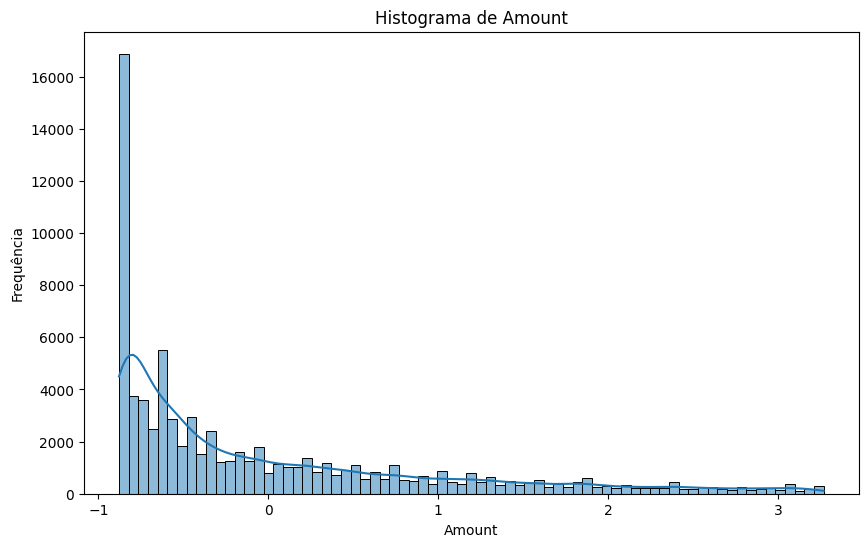

In [110]:
plot_histogram(X_train_norm, 'Amount')

## Geração das janelas de tempo

In [111]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

train_gen = TimeseriesGenerator(X_train_norm, y_train, length=seq_length, batch_size=32)
val_gen = TimeseriesGenerator(X_val_norm, y_val, length=seq_length, batch_size=32)
test_gen = TimeseriesGenerator(X_test_norm, y_test, length=seq_length, batch_size=32)

print(f"Tamanho do generator de treino: {len(train_gen)} batches")

Tamanho do generator de treino: 2482 batches


# Geração de Modelos

## Definição das métricas utilizadas

In [112]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_metrics():
  precision = Precision(name="precision")
  recall = Recall(name="recall")
  auc_roc = AUC(name='auc_roc')
  auc_pr = AUC(curve='PR', name='auc_pr')
  return [precision, recall, auc_roc, auc_pr]

## Função Básica para criação do Modelo

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

# criar o callback para salvar o melhor modelo
checkpoint_callback = ModelCheckpoint(
    filepath='baseline_model.keras',
    monitor='val_loss',  # Changed monitor to val_loss
    save_best_only=True
)

def generate_model(optimizer='adam', loss='binary_crossentropy'):
  model = Sequential()
  model.add(layers.LSTM(64, return_sequences=True, input_shape=(seq_length, X_train_norm.shape[1])))
  model.add(layers.Dropout(0.2))
  model.add(layers.LSTM(32))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=[*get_metrics()])

  return model

model = generate_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │        24,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,513 (142.63 KB)

 Trainable params: 36,513 (142.63 KB)

 Non-trainable params: 0 (0.00 B)

## Função para plotar as métricas

In [114]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history_data(history):
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Precision
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['precision'], label='Training Precision')
    plt.plot(history.history['val_precision'], label='Validation Precision')
    plt.title('Model Precision over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Recall
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['recall'], label='Training Recall')
    plt.plot(history.history['val_recall'], label='Validation Recall')
    plt.title('Model Recall over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute F1-Score
    train_precision = np.array(history.history['precision'])
    train_recall = np.array(history.history['recall'])
    val_precision = np.array(history.history['val_precision'])
    val_recall = np.array(history.history['val_recall'])

    train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall + 1e-8)
    val_f1 = 2 * (val_precision * val_recall) / (val_precision + val_recall + 1e-8)

    # Plot F1-Score
    plt.figure(figsize=(12, 6))
    plt.plot(train_f1, label='Training F1-Score')
    plt.plot(val_f1, label='Validation F1-Score')
    plt.title('Model F1-Score over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot AUC ROC
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['auc_roc'], label='Training AUC-ROC')
    plt.plot(history.history['val_auc_roc'], label='Validation AUC-ROC')
    plt.title('Model AUC-ROC over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('AUC-ROC')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot AUC PR
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['auc_pr'], label='Training AUC-PR')
    plt.plot(history.history['val_auc_pr'], label='Validation AUC-PR')
    plt.title('Model AUC-ROC over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('AUC-ROC')
    plt.legend()
    plt.grid(True)
    plt.show()


## Primeiro Modelo (Baseline)

O primeiro modelo será utilizado as compilação padrão da função: (loss=binary_crossentropy, optimizer=adam). Além disso, as classes serão balanceadas na função de perda utilizando class_weights - isso será padrão para todos os modelos

In [115]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [116]:
history = model.fit(
    train_gen,  # Use the training data generator
    epochs=25,
    validation_data=val_gen,  # Use the validation data generator
    class_weight=class_weight_dict,
    callbacks=[checkpoint_callback]
)

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2482/2482 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - auc_pr: 0.0000e+00 - auc_roc: 0.0000e+00 - loss: 0.0174 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc_pr: 0.0018 - val_auc_roc: 0.5056 - val_loss: 0.0882 - val_precision: 0.0036 - val_recall: 0.1081
Epoch 2/25
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - auc_pr: 0.0000e+00 - auc_roc: 0.0000e+00 - loss: 3.1897e-05 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc_pr: 0.0019 - val_auc_roc: 0.5187 - val_loss: 0.0859 - val_precision: 0.0038 - val_recall: 0.1081
Epoch 3/25
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - auc_pr: 0.0000e+00 - auc_roc: 0.0000e+00 - loss: 7.3639e-06 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc_pr: 0.0019 - val_auc_roc: 0.5259 - val_loss: 0.0854 - val_precision: 0.0038 - val_recall: 0.1081
Epoch 4/25
2482/2482 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - auc_pr: 0.0000e+00 - auc_roc: 0.0000e+00 - loss: 1.9890e-06 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_auc_pr: 0.0019 - val_auc_roc: 0.5193

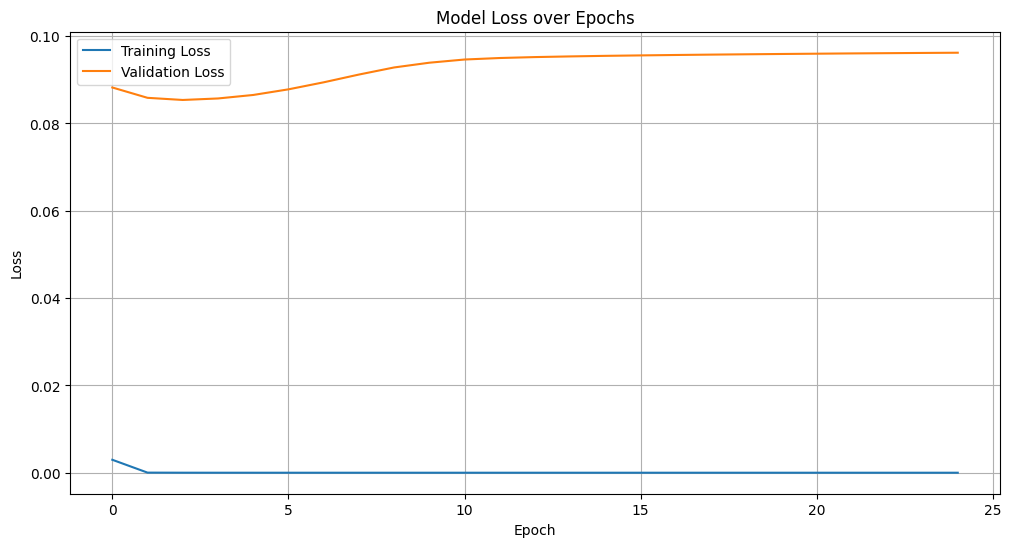

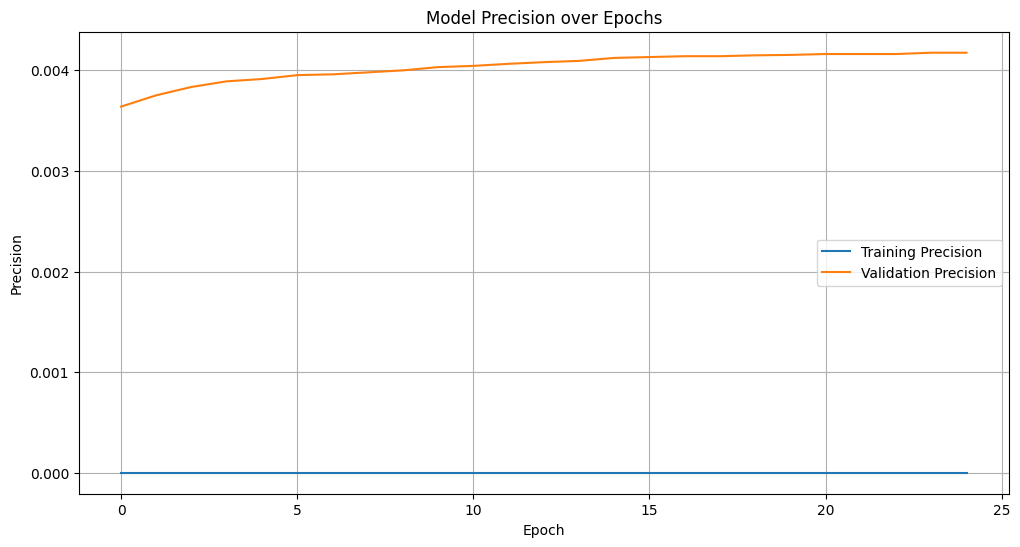

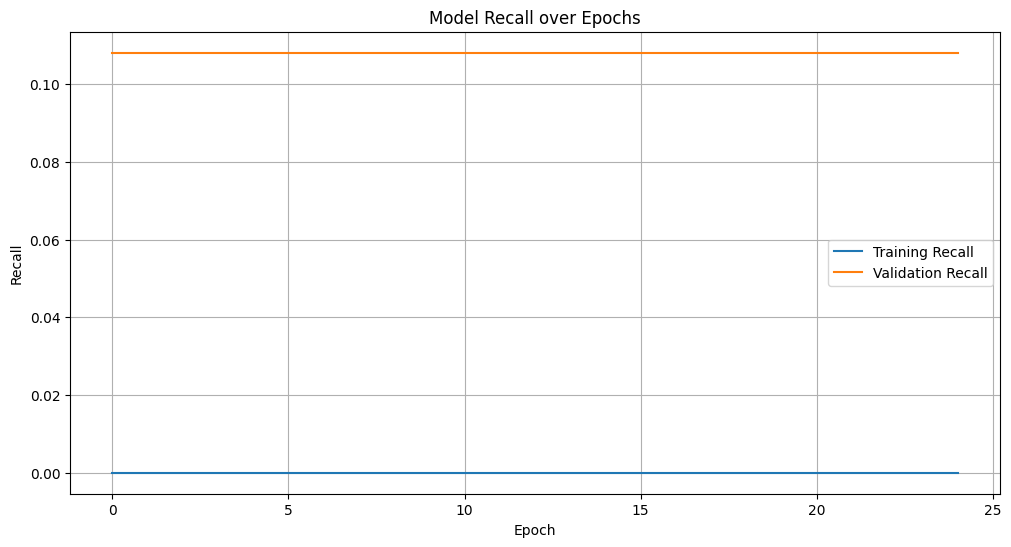

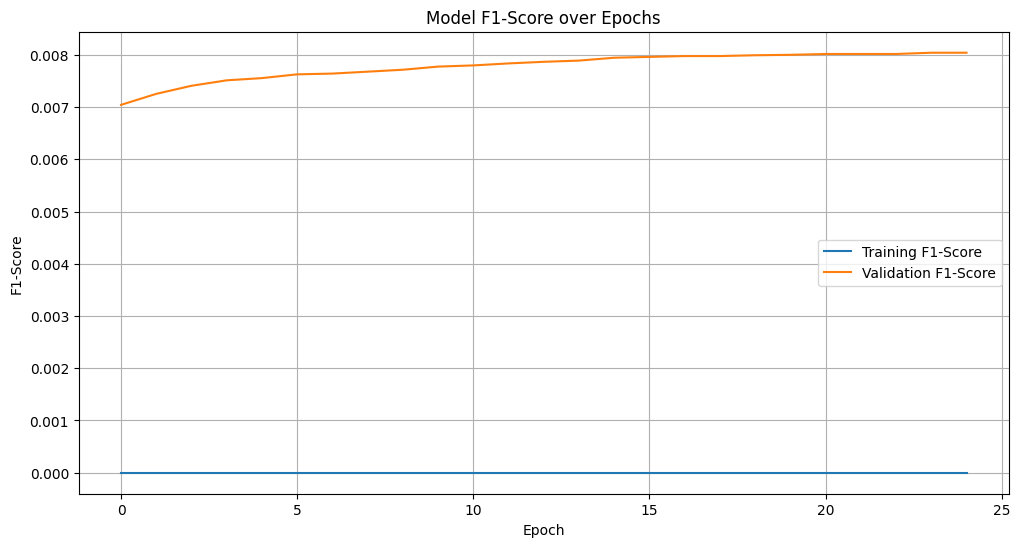

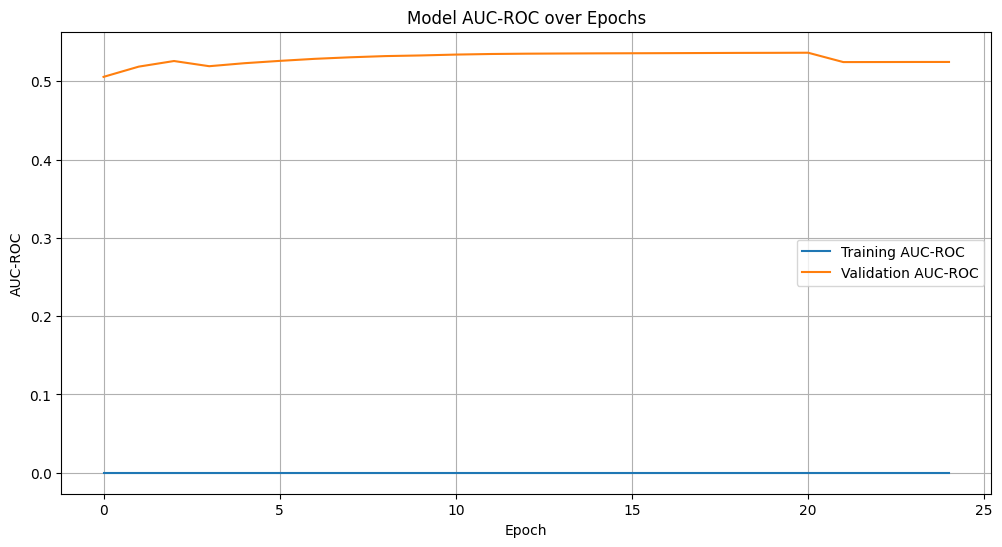

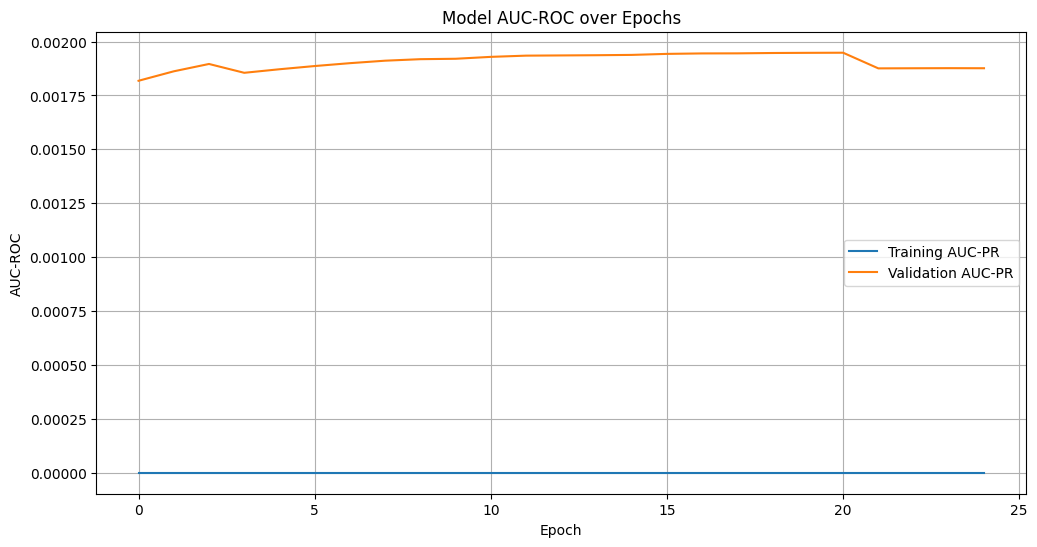

In [117]:
plot_history_data(history)